In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

1. This Dataset contains null value

2. Except seatno.,PH-121 ,HS-101, CS-105,CGPA  all columns have null values

3. we have to predict CGPA, CGPA is the target variable, and rest of them are features or independent variable

4. Target variable is continous so, it is regression problem


In [4]:
# drop seat no. it is unwanted column
df=df.drop(['Seat No.'],axis=1)

In [5]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [7]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
# check null values row wise
null=df.isnull().sum(axis=1)
null

0      0
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Length: 571, dtype: int64

In [8]:
# counts the total null values row wise
null_value=df[df.isnull().any(axis=1)]
null_value_counts=null_value.isnull().sum(axis=1)
null_value_counts


44     36
60     24
86      7
91     19
137    30
       ..
423     1
424     1
481     9
543     5
565    35
Length: 154, dtype: int64

# Handling missing values with mode

In [9]:
for i in df.columns:
    print(i)
    print(df[i].mode()[0])

PH-121
A-
HS-101
A-
CY-105
A
HS-105/12
A
MT-111
A-
CS-105
A
CS-106
A-
EL-102
A-
EE-119
A-
ME-107
A-
CS-107
A
HS-205/20
A-
MT-222
A-
EE-222
A
MT-224
A-
CS-210
A-
CS-211
A-
CS-203
A-
CS-214
C
EE-217
A-
CS-212
A-
CS-215
A-
MT-331
A
EF-303
B
HS-304
A-
CS-301
A-
CS-302
A-
TC-383
A
MT-442
A-
EL-332
A-
CS-318
A-
CS-306
A-
CS-312
A+
CS-317
B-
CS-403
A
CS-421
B
CS-406
A-
CS-414
A
CS-419
A-
CS-423
A-
CS-412
A-
CGPA
3.019


in most of the columns A and A- has high value_counts

In [10]:
def fillna_with_modes(column):
    modes = column.mode()
    if len(modes) > 0:
        return column.fillna(modes[0])
    else:
        return column


In [11]:
df=df.apply(fillna_with_modes,axis=1)
df

C:\Users\A\folder\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [12]:
#find no.of unique value and value counts
for i in df.columns:
    print(i)
    print("unique value:", df[i].unique())
    print("number of unique value:", df[i].nunique())
    print("value counts")
    print(df[i].value_counts())
    print("*******----------*******")

PH-121
unique value: ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
number of unique value: 13
value counts
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
*******----------*******
HS-101
unique value: ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
number of unique value: 12
value counts
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
*******----------*******
CY-105
unique value: ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
number of unique value: 13
value counts
A     177
A-    120
B+     50
B      49
B-     42
D      32
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
*******----------*******
HS-105/12
unique value: ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F']
number of unique value: 13

now all missing values have filled with their modes

In [13]:
# check out all missing value filled
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

all null values are filled

# Univariant Analysis

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


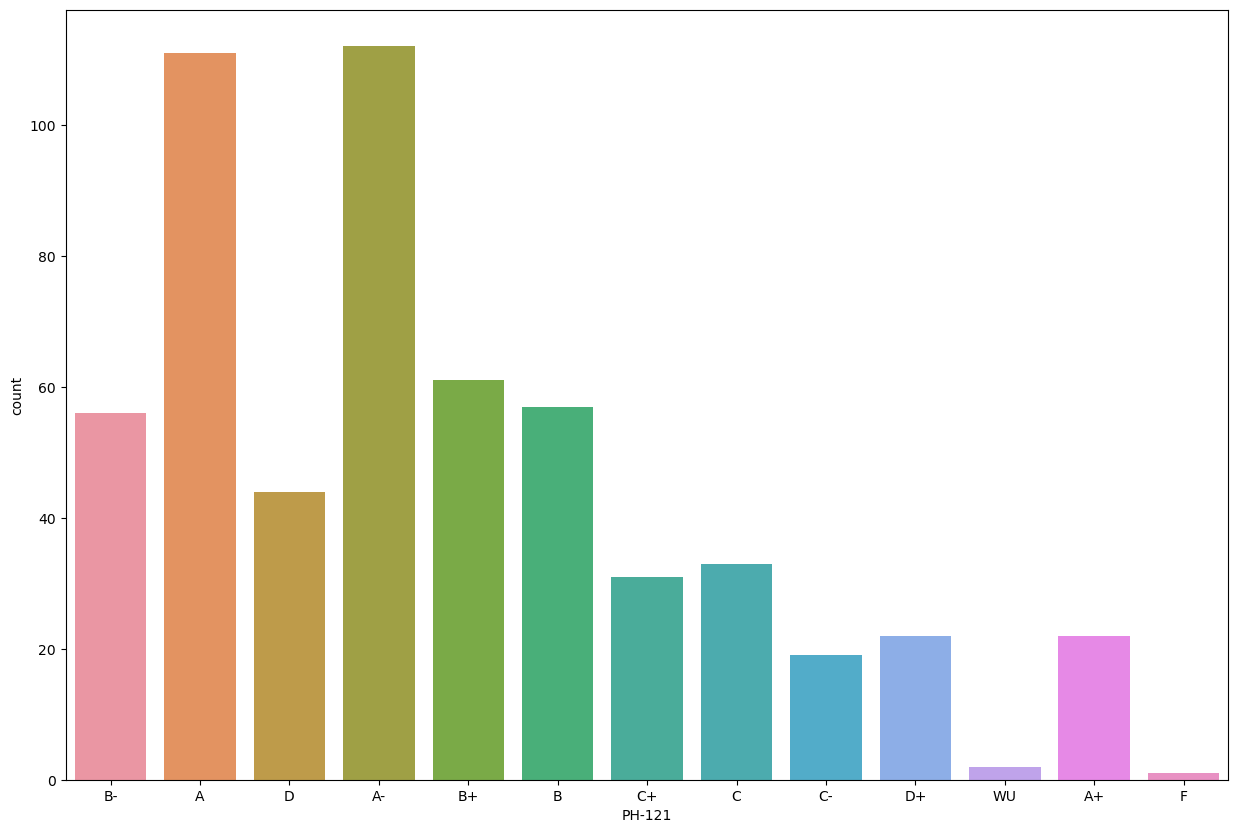

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


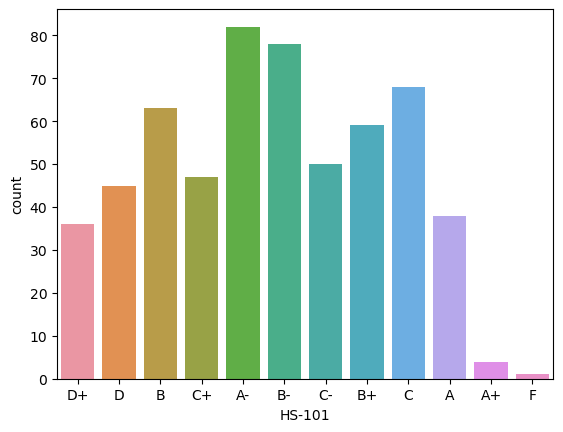

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


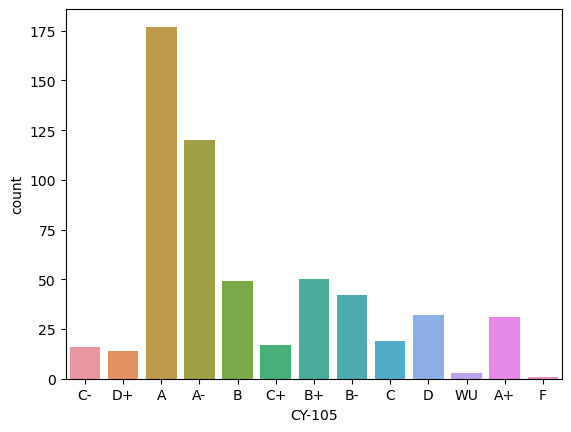

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


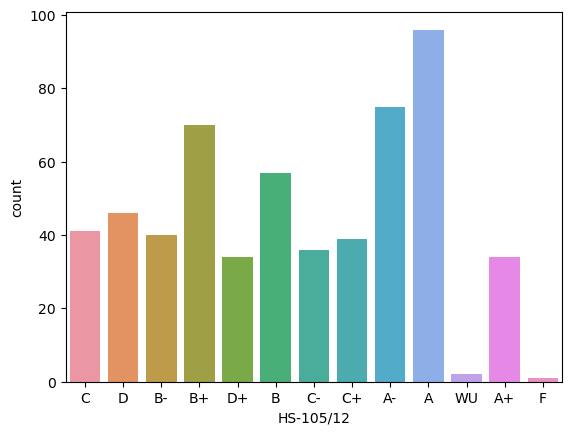

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


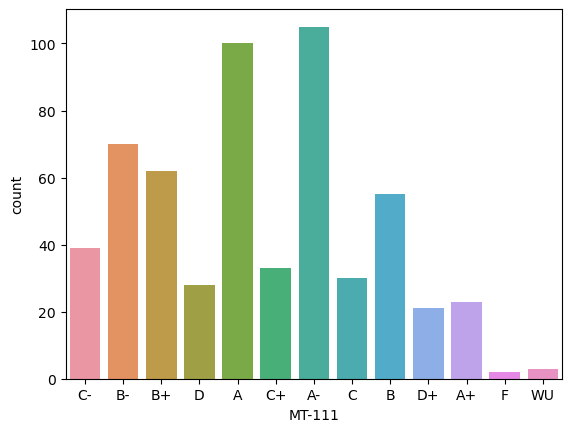

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


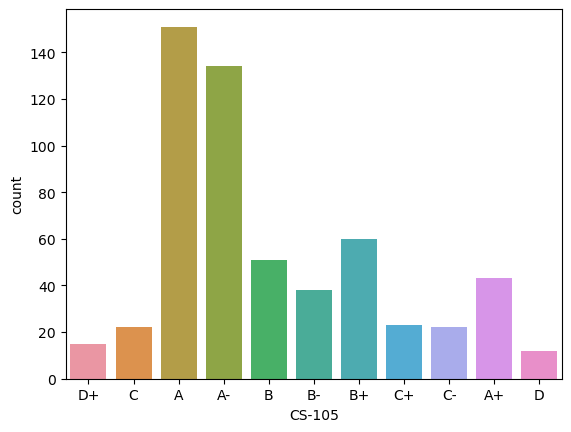

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


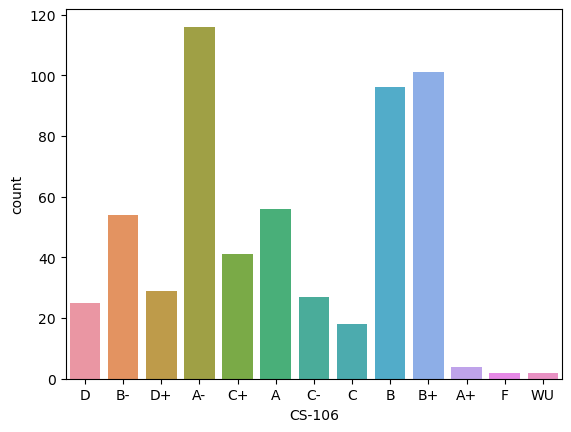

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


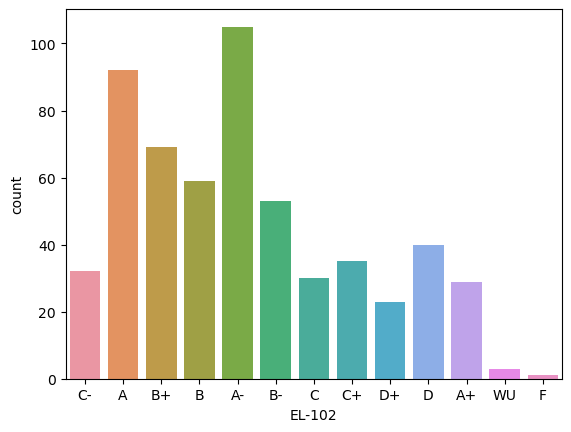

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


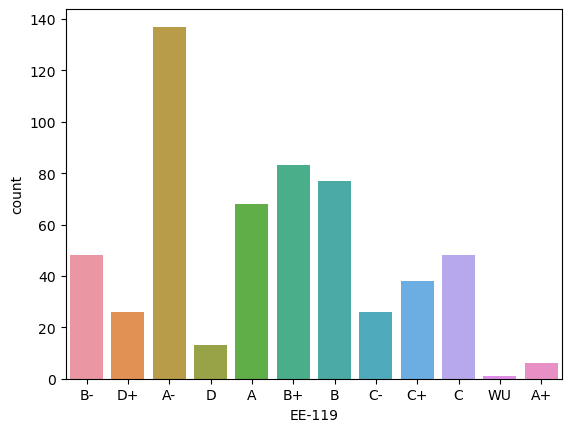

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


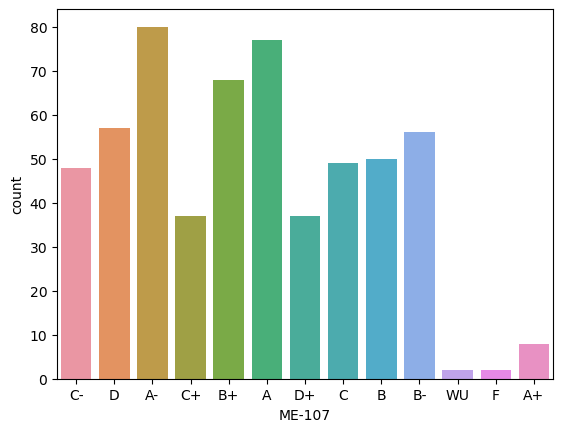

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


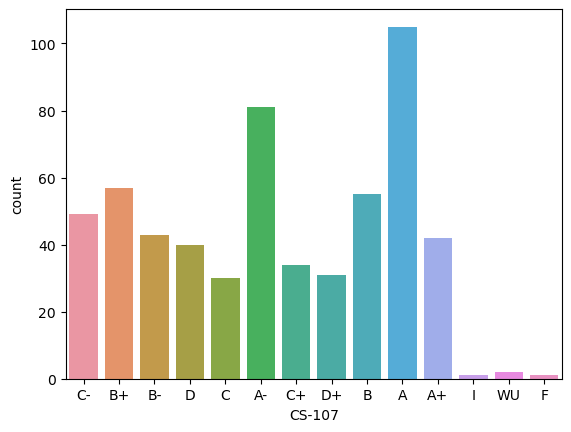

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


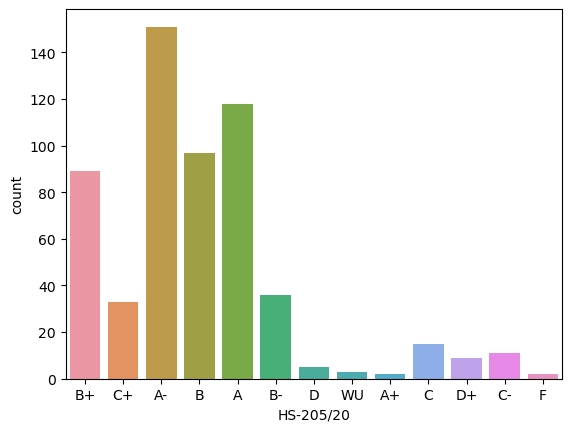

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


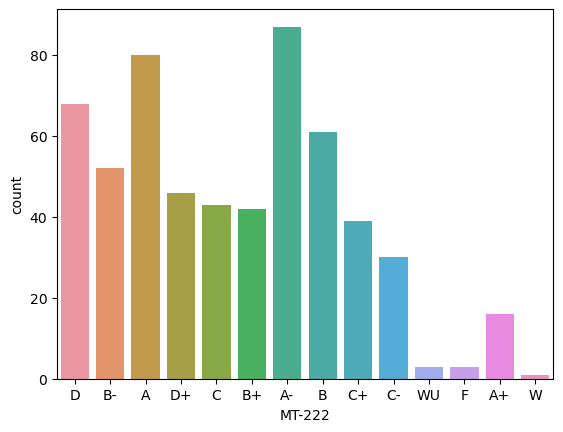

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


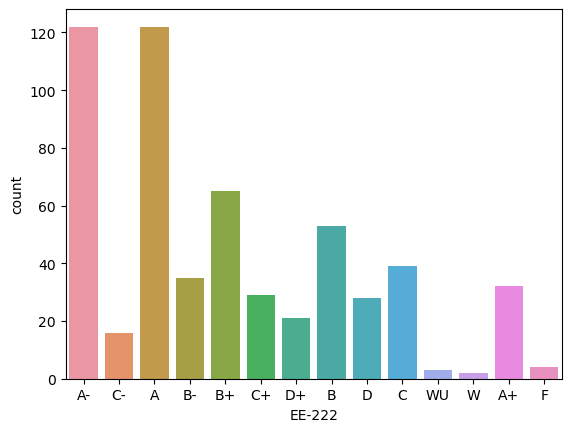

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


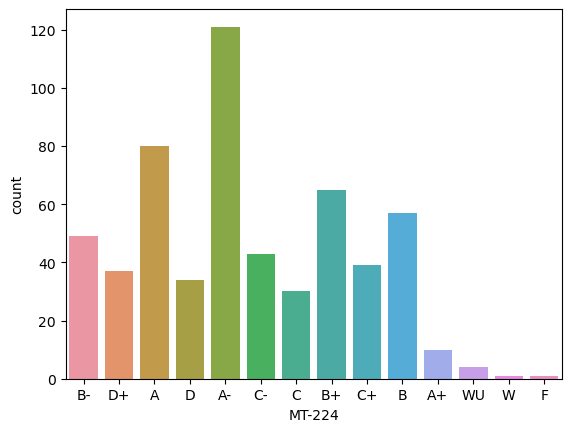

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


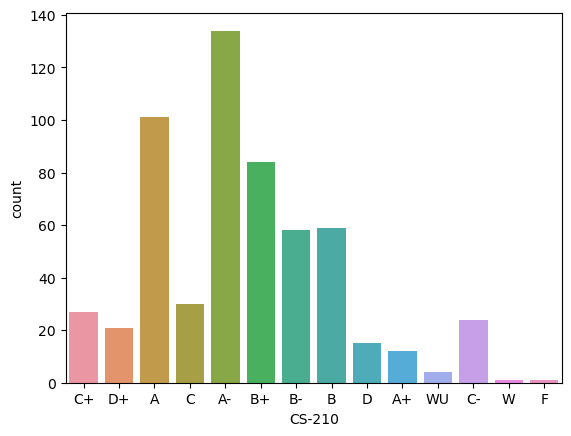

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


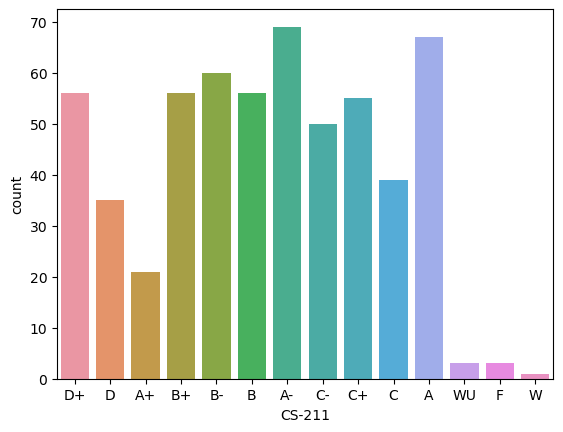

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


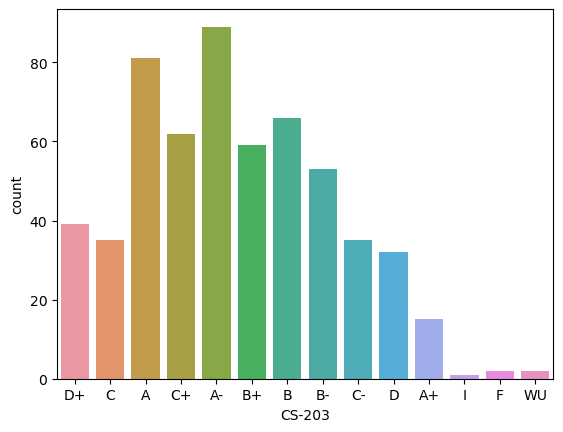

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


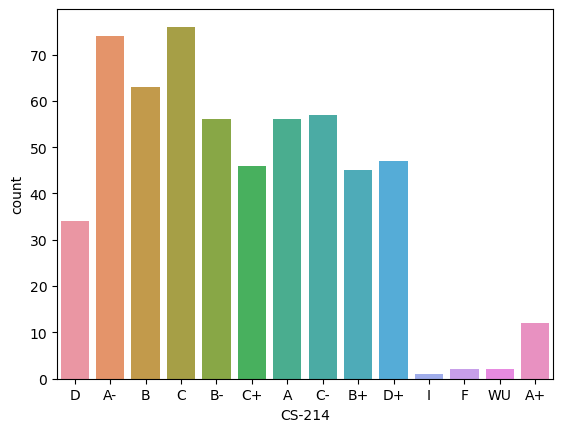

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


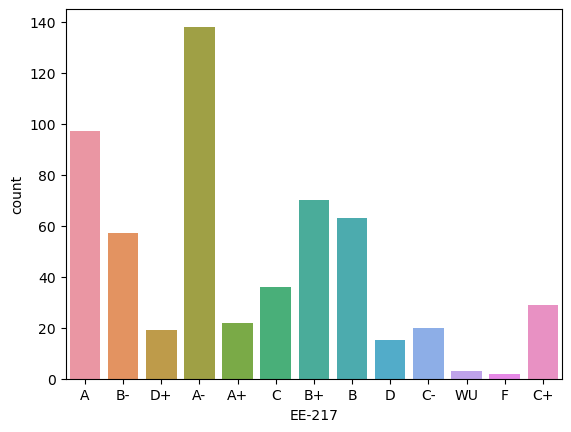

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


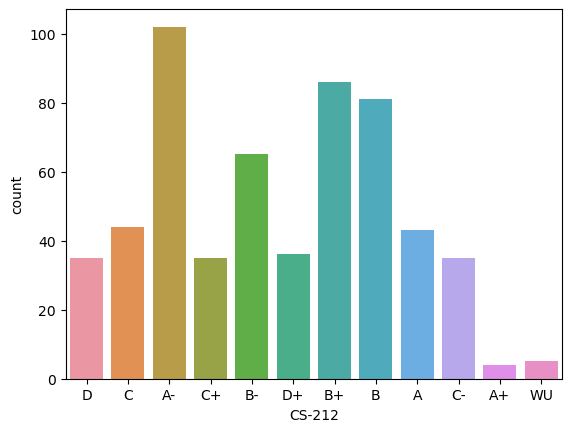

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


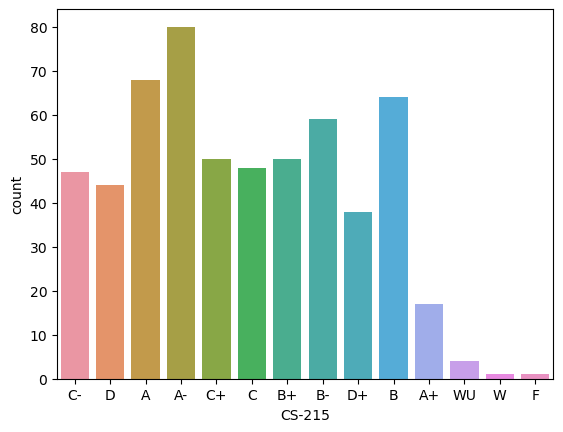

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


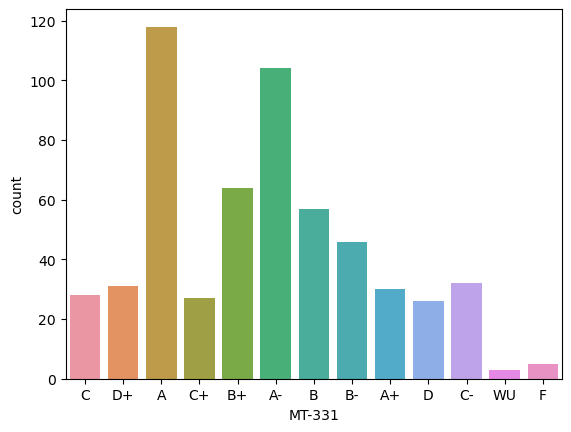

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


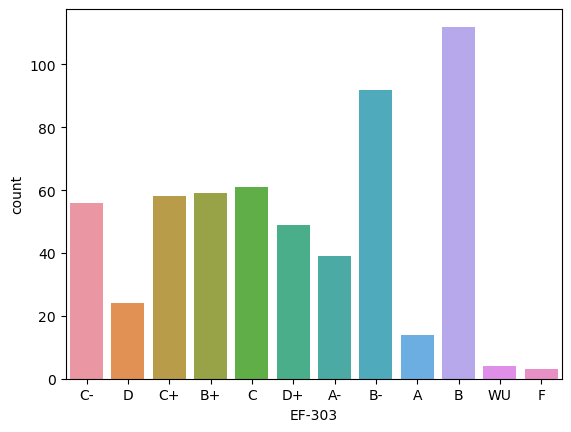

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


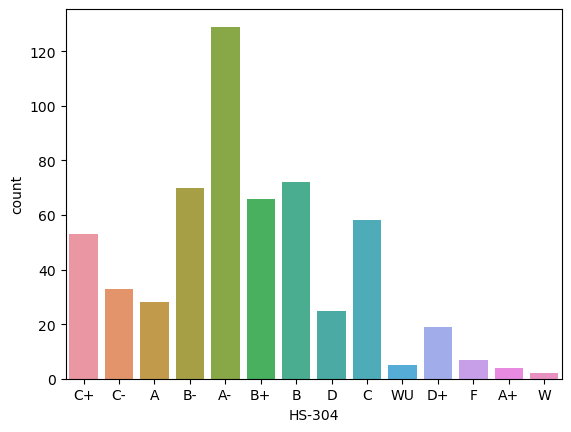

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


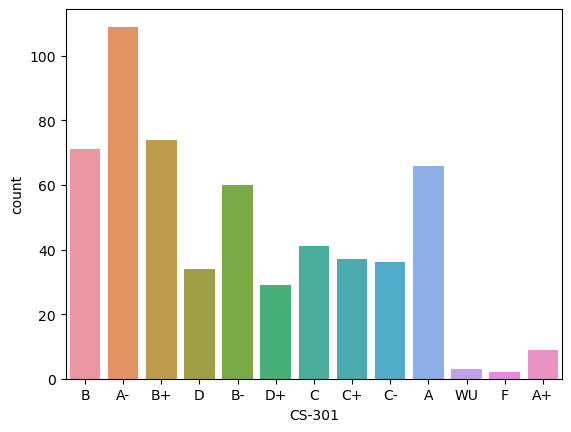

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


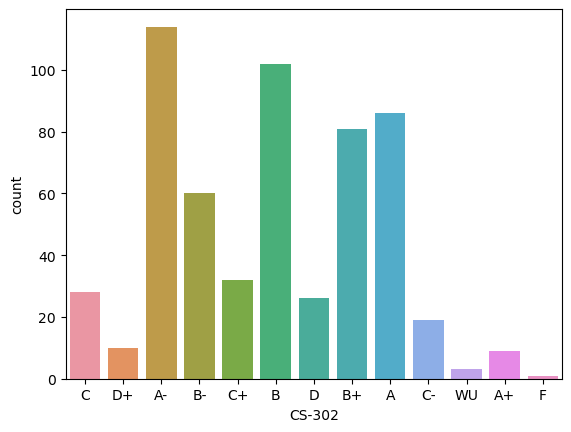

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


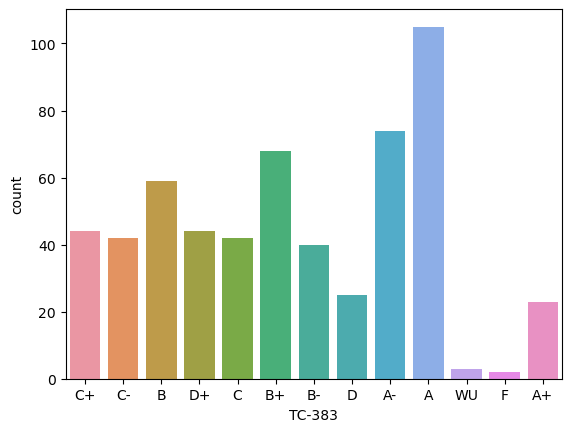

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


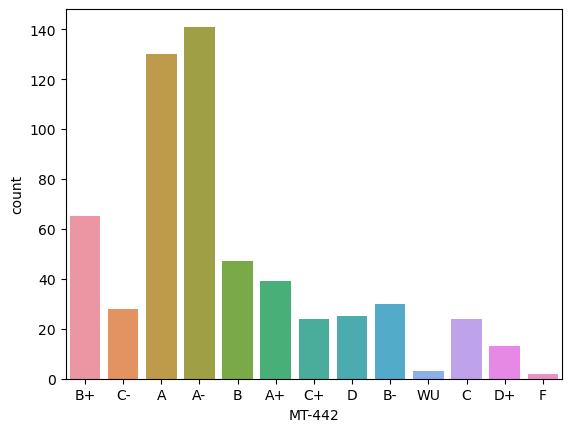

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


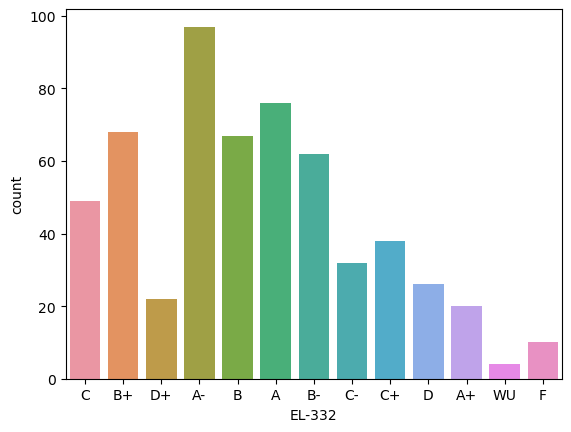

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


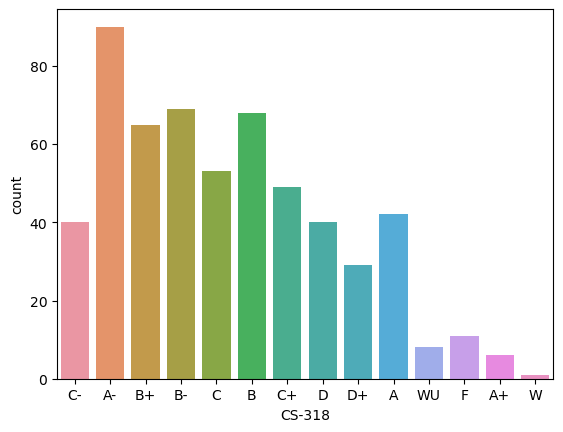

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


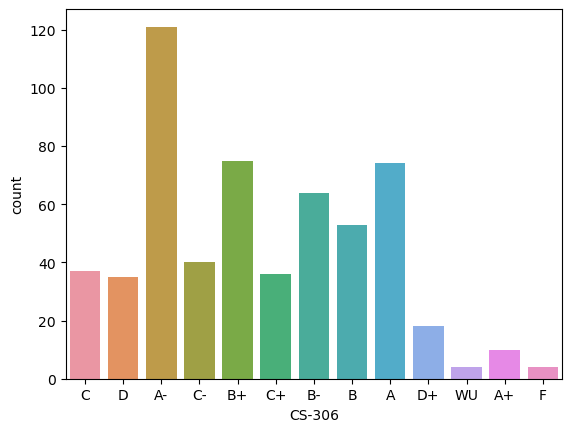

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


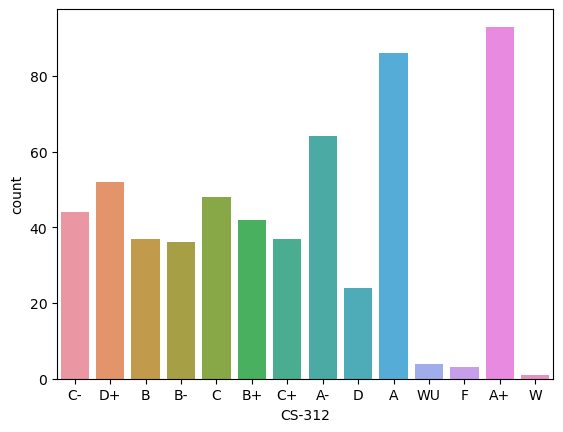

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


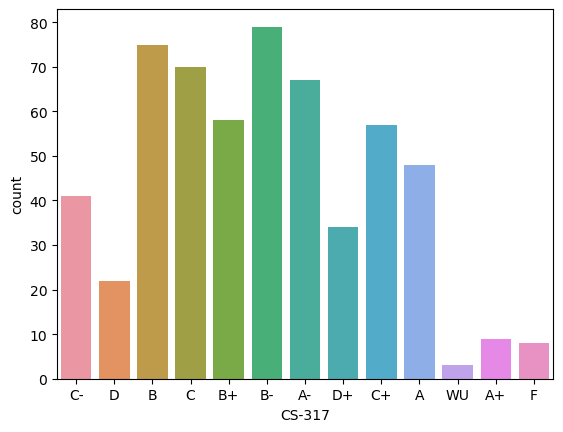

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


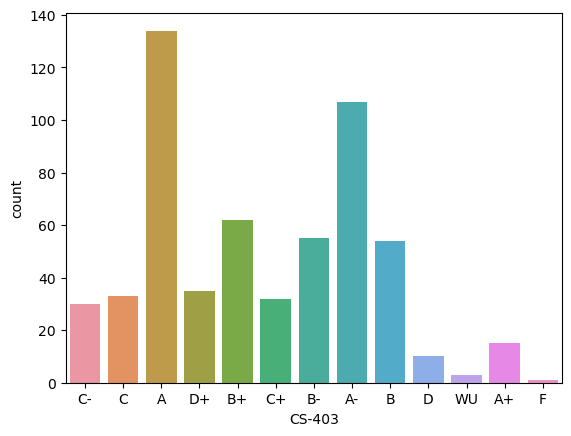

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


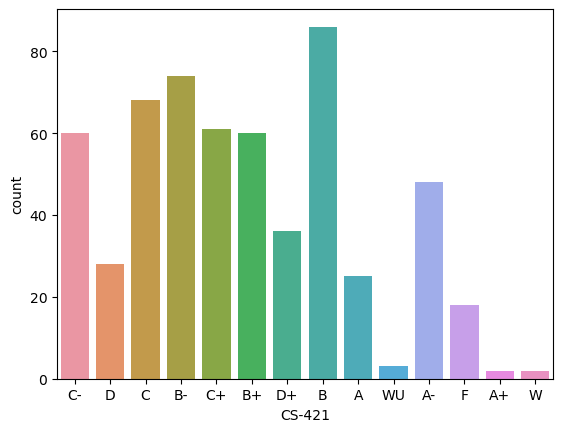

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


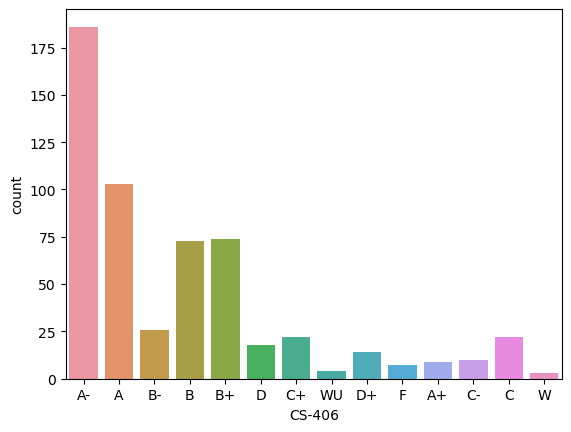

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


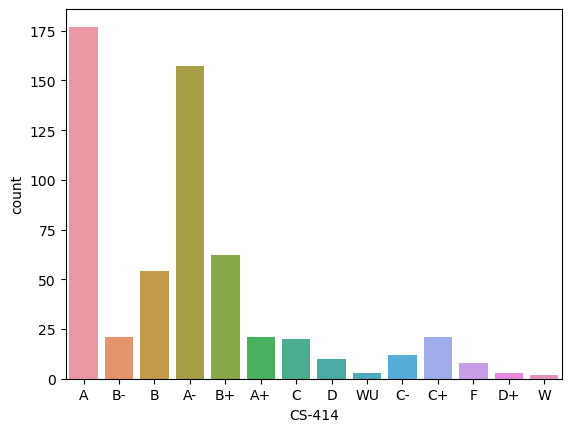

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


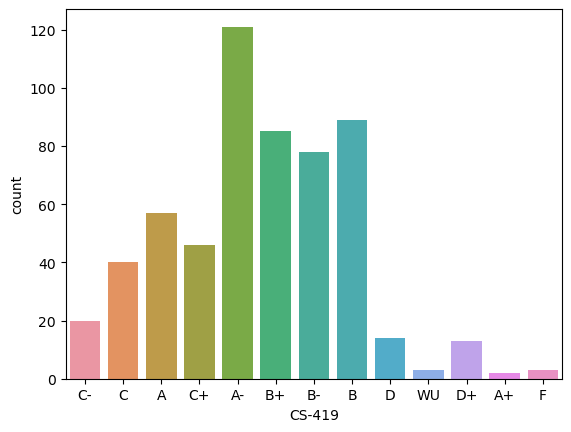

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


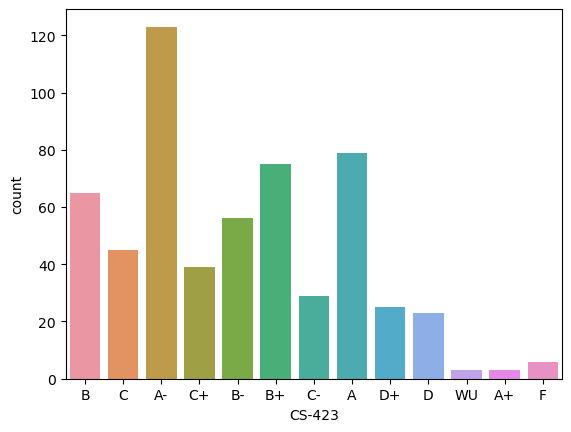

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


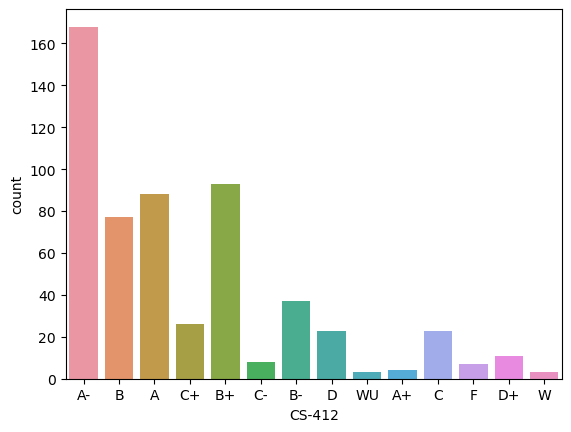

None

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


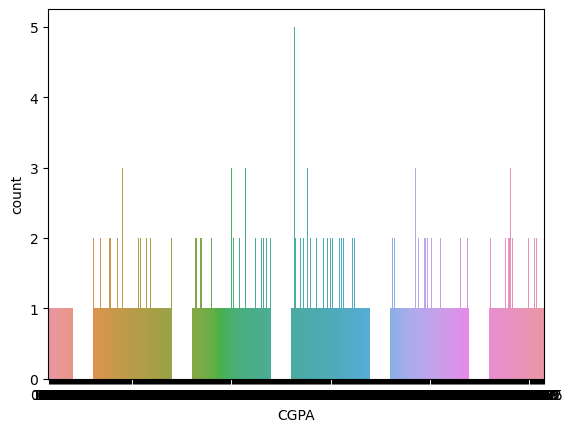

None

In [16]:
# countplot
plt.figure(figsize=(15,10))
for i in df.columns:
    sns.countplot(df[i])
    display(plt.show())

in most of the column has 13, 14 or 15 unique value

and A+ and A- has high value

In [17]:
df['CGPA'].max()

3.985

In [18]:
df['CGPA'].min()

0.8

In [19]:
col=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

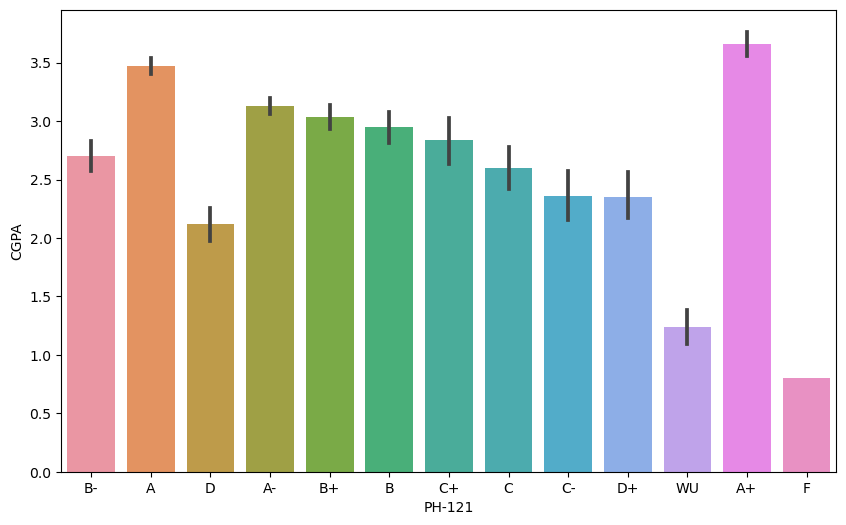

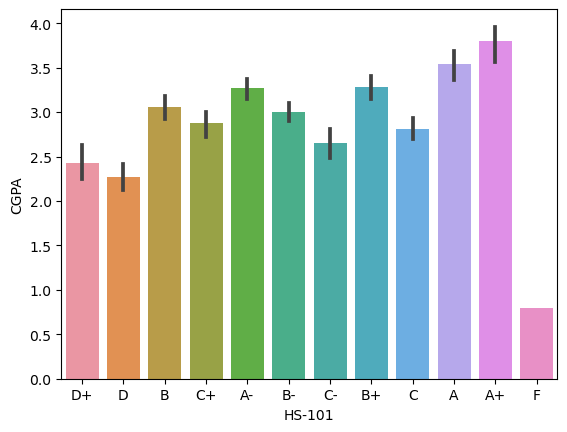

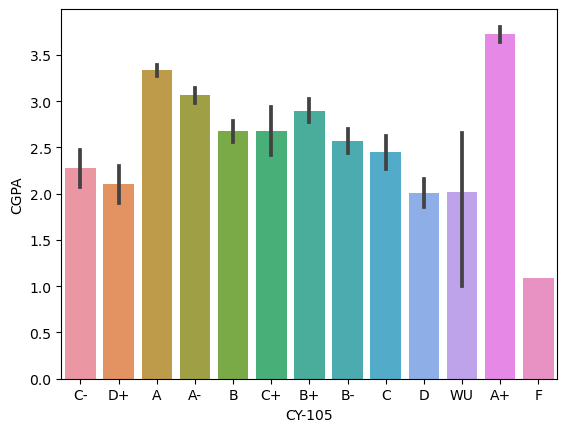

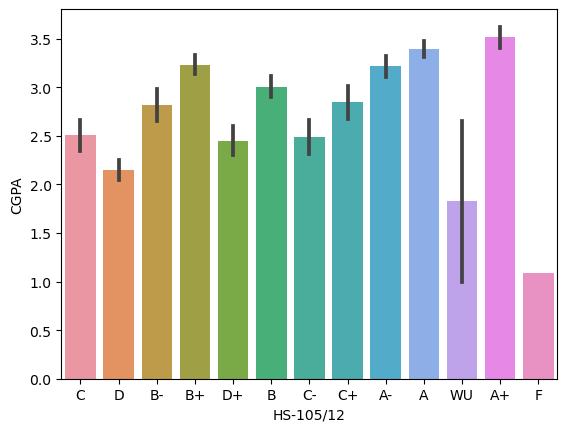

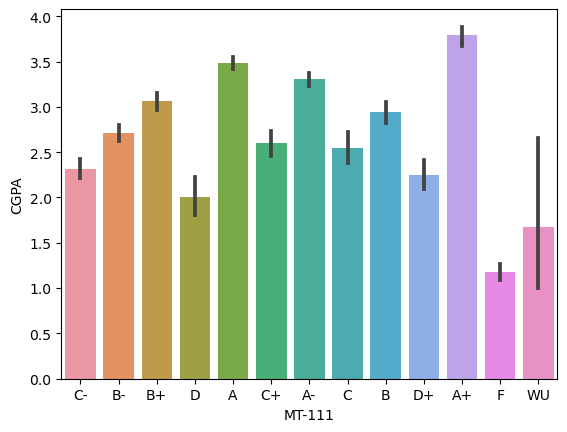

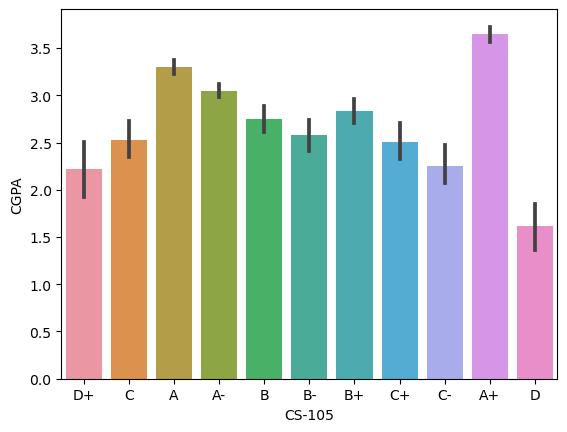

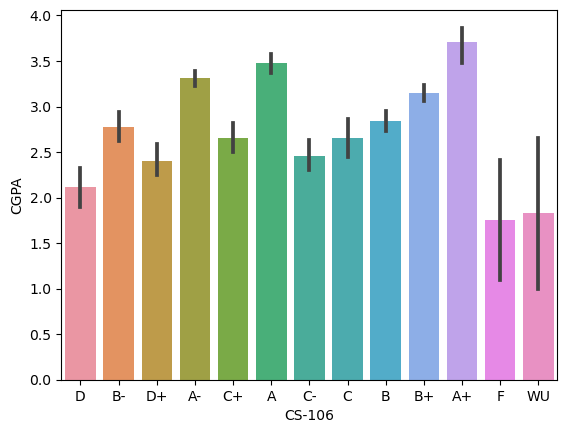

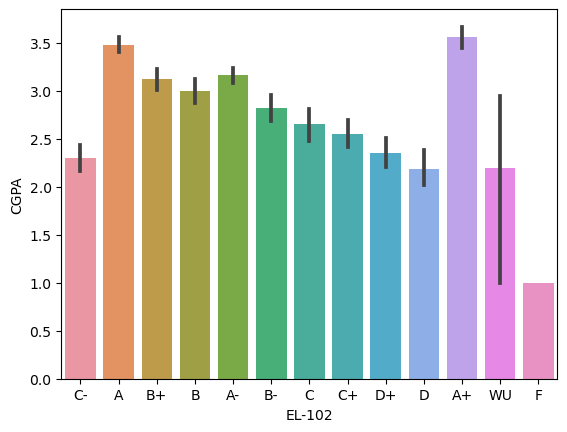

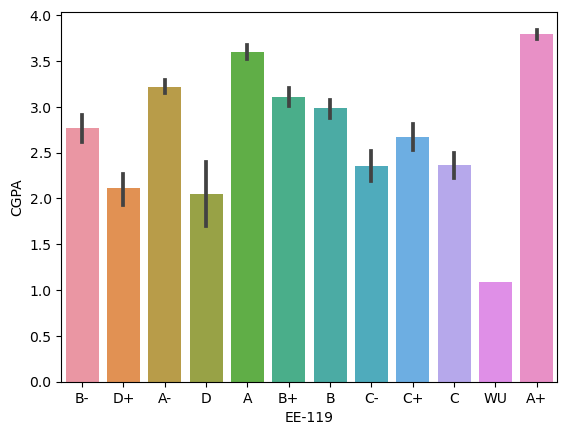

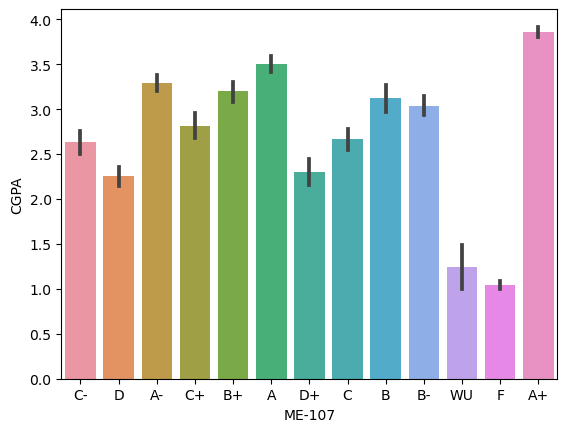

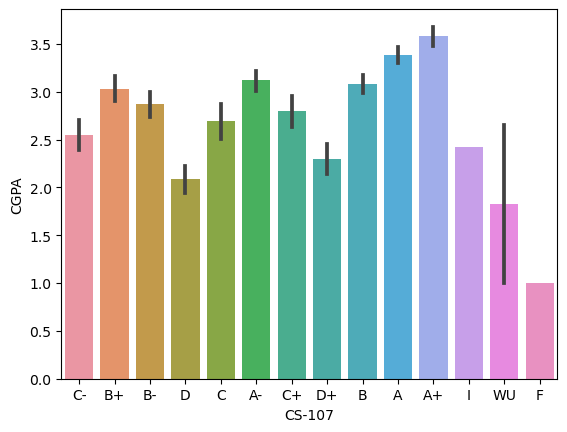

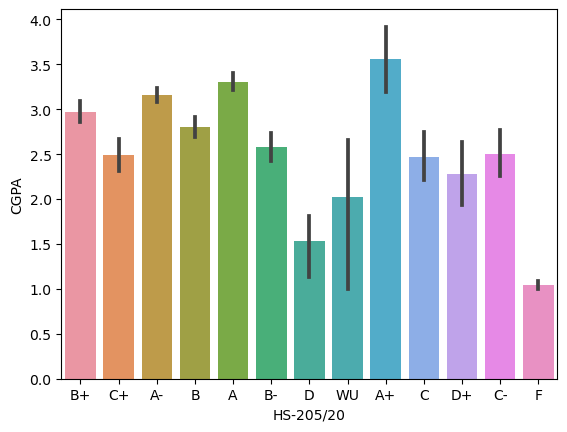

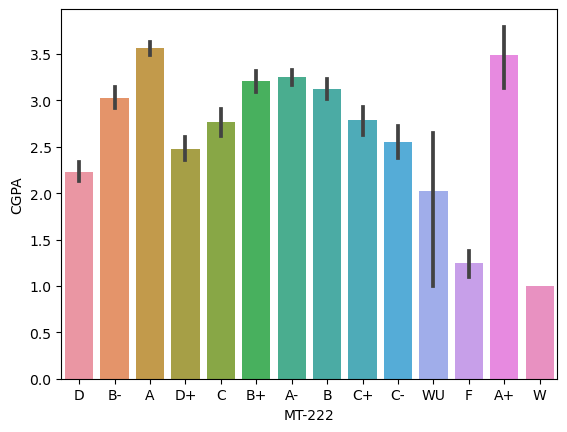

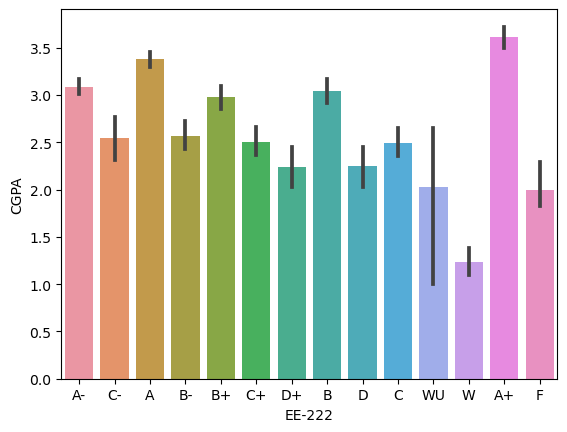

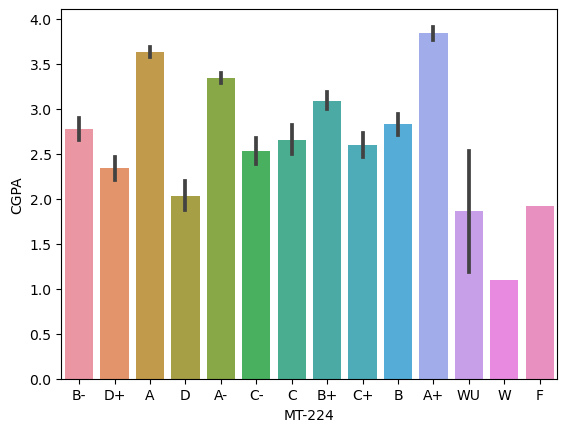

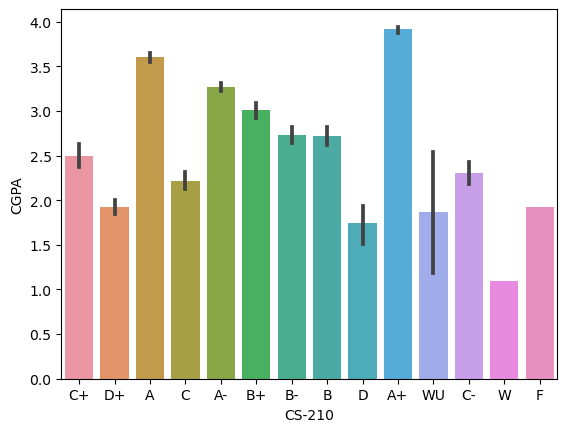

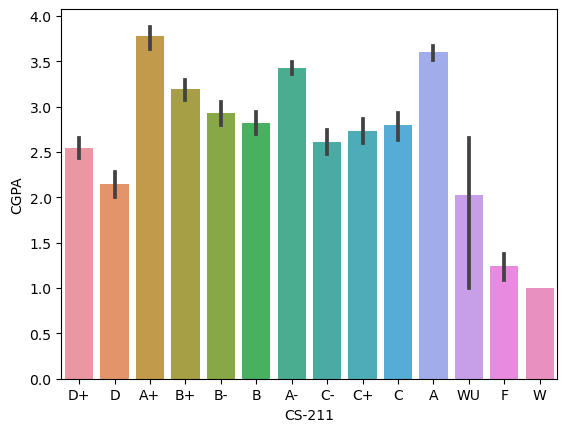

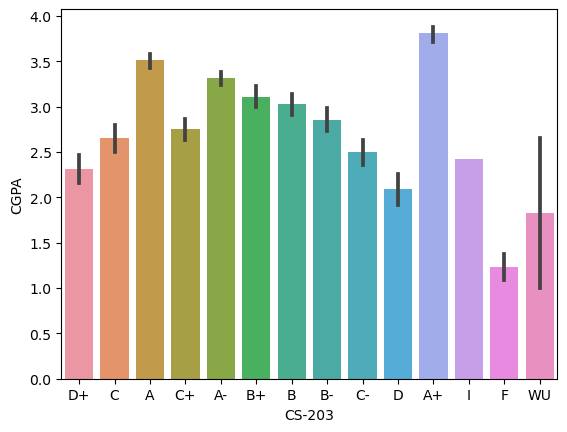

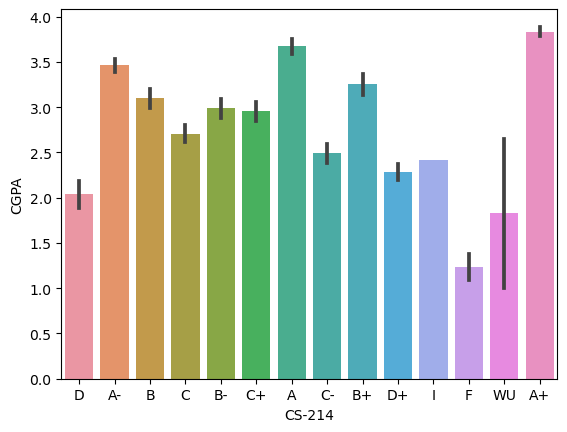

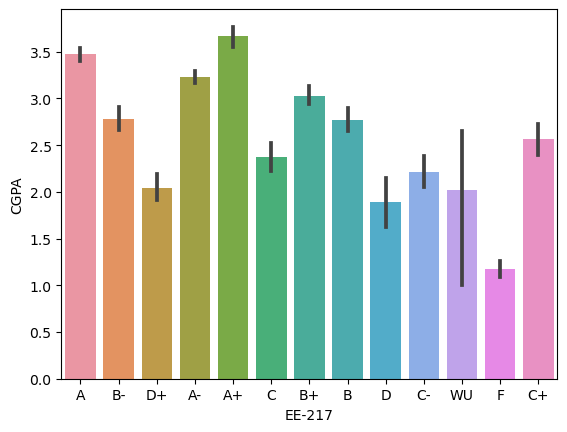

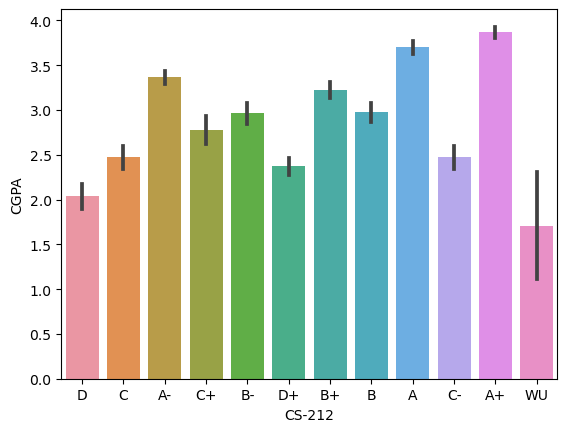

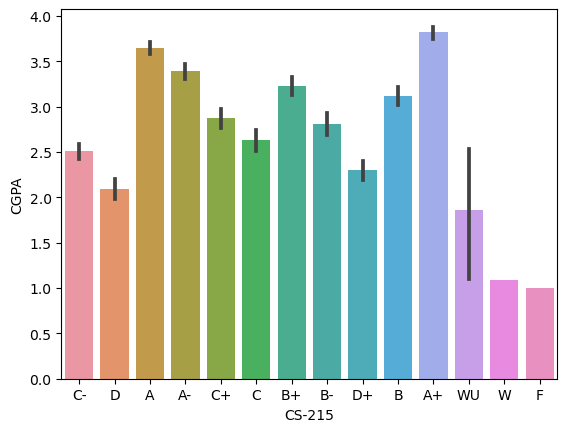

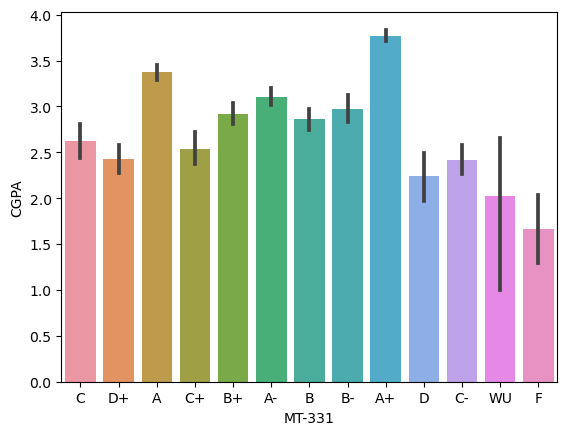

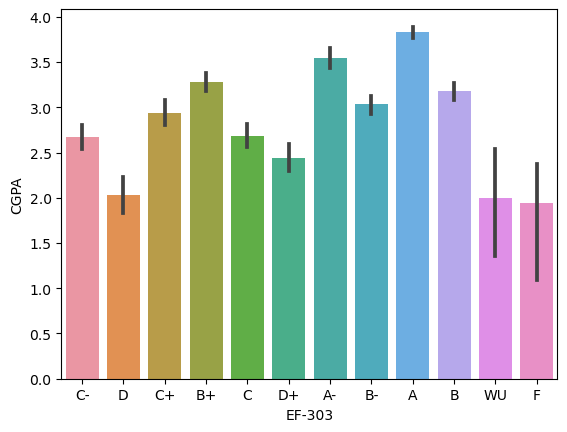

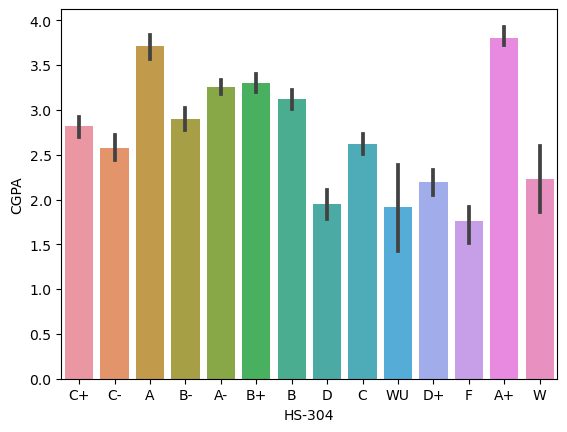

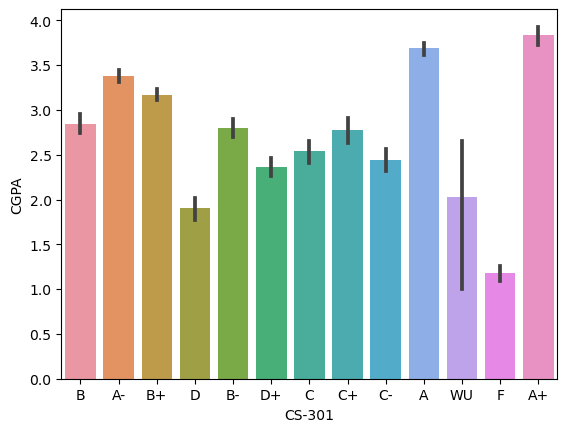

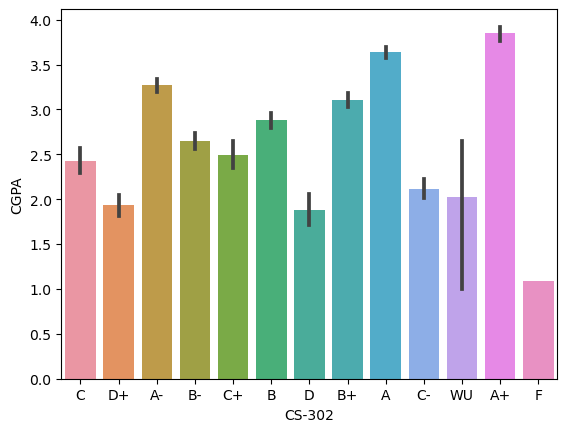

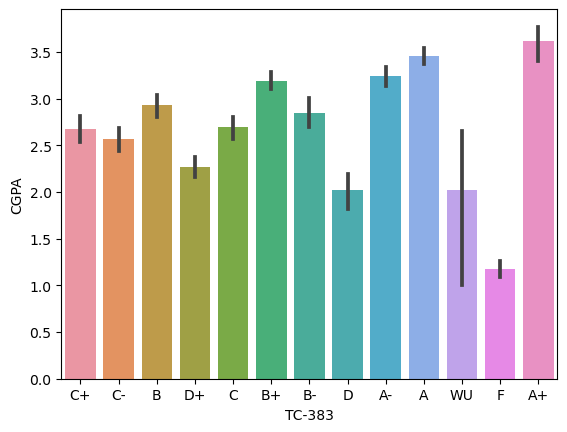

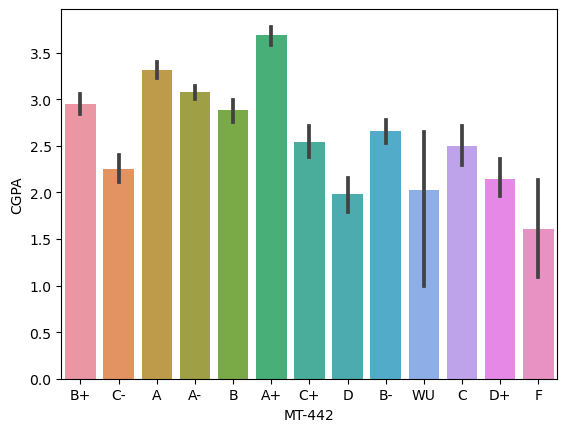

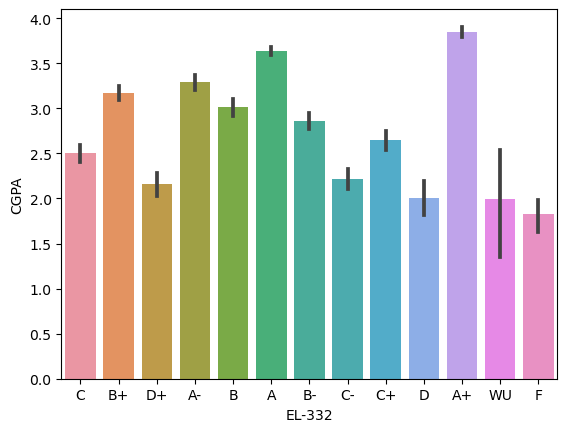

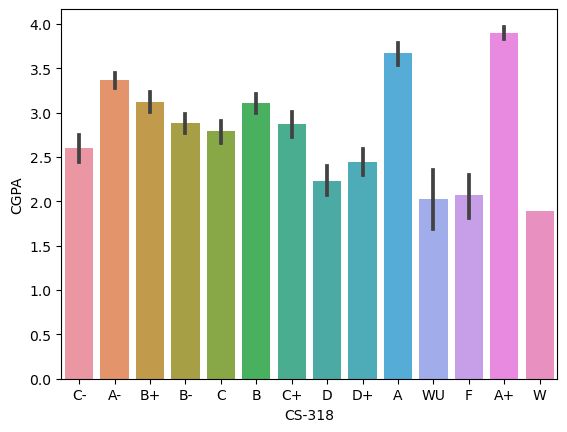

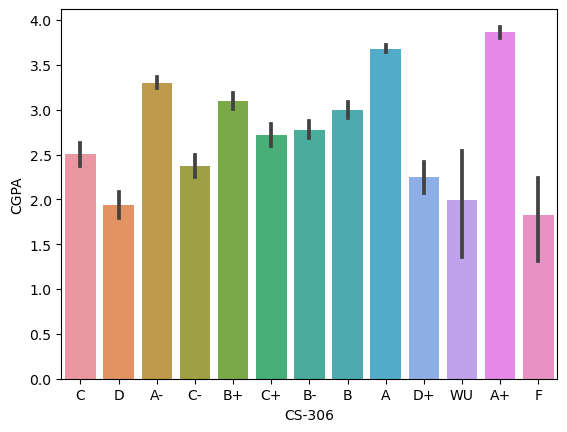

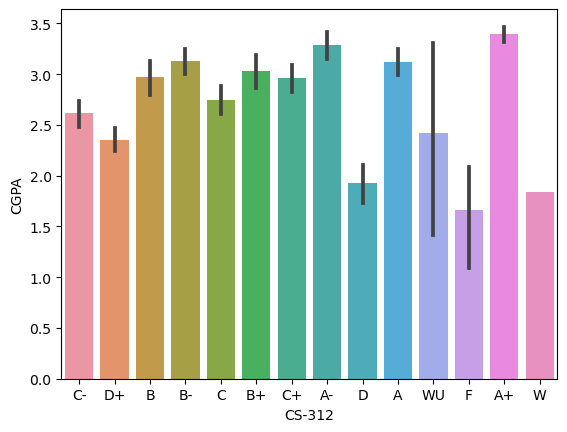

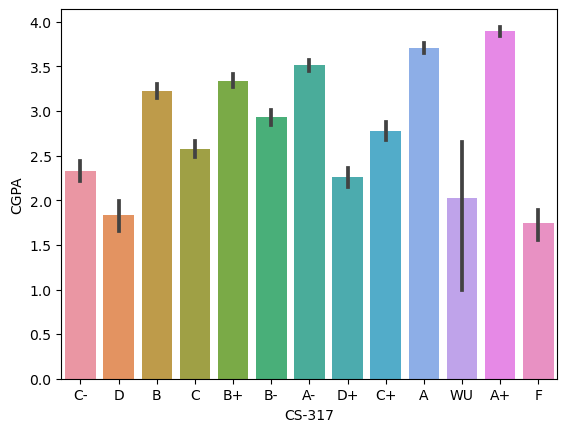

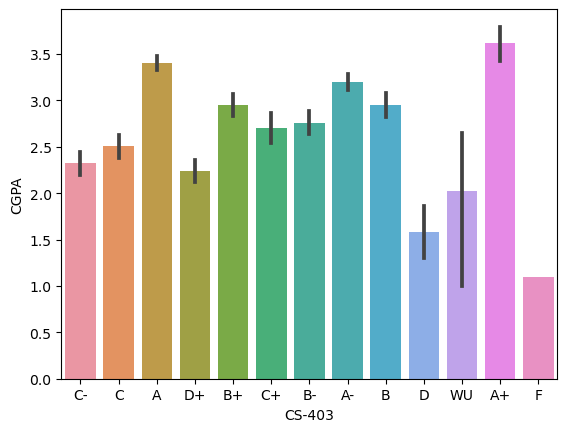

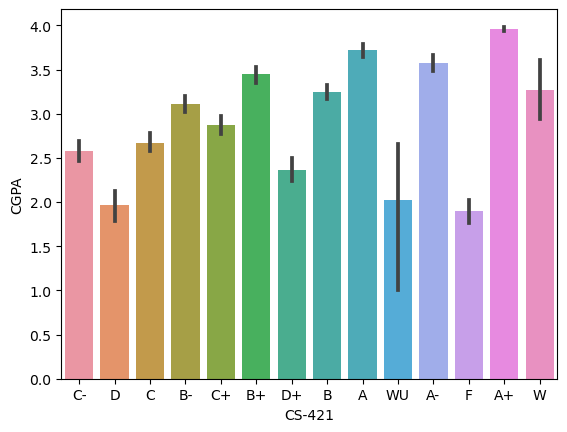

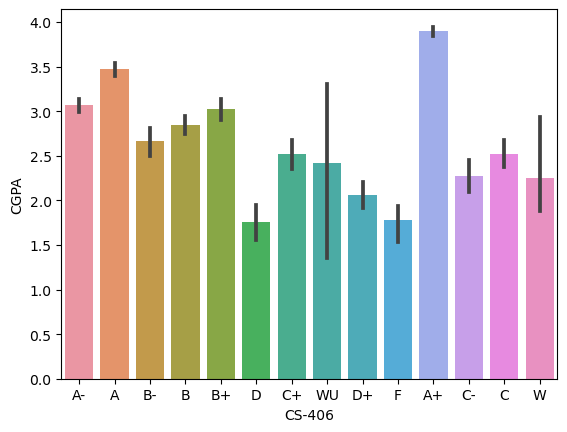

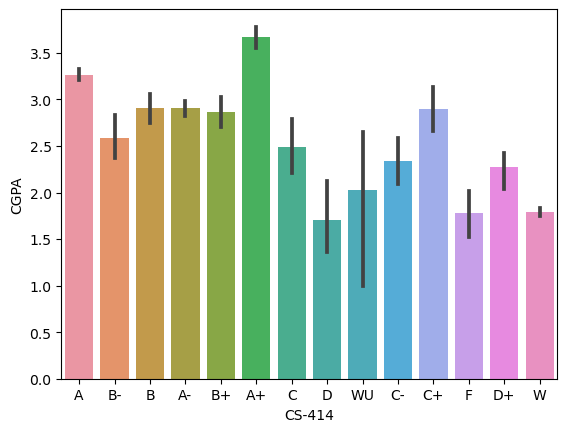

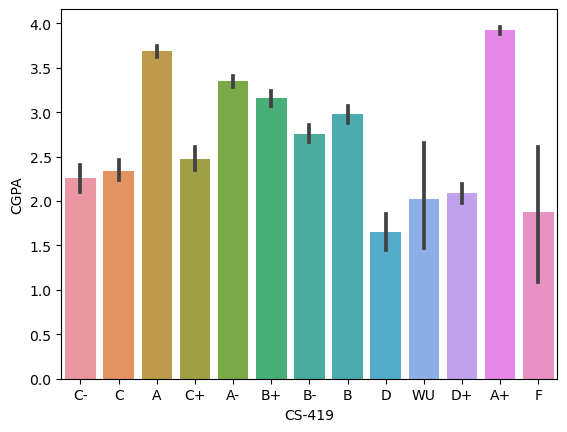

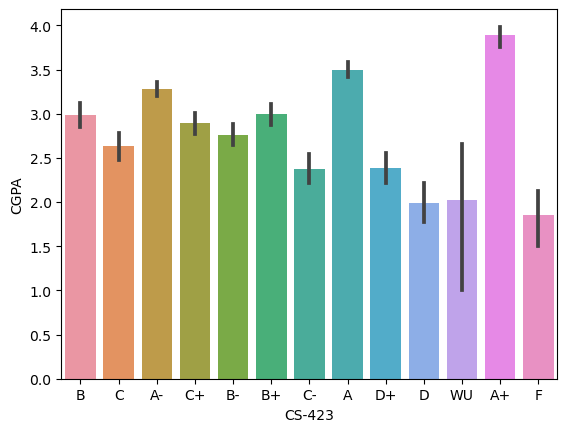

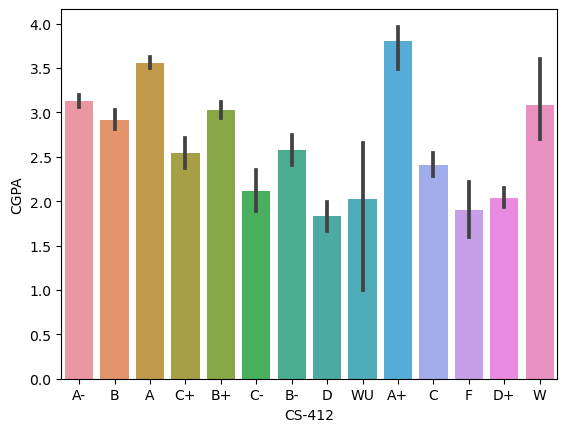

In [20]:
plt.figure(figsize=(10,6))
for i in col:
    sns.barplot(x=i,y='CGPA',data=df)
    plt.show()

most of student got A+ and A-

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
col=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

In [26]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [27]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [28]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.565349,0.506816,0.483631,0.609990,0.315012,0.438691,0.589487,0.542325,...,0.111278,0.498741,0.410508,0.360972,0.421660,0.257516,0.535561,0.184990,0.500279,-0.663135
HS-101,0.382436,1.000000,0.335889,0.474593,0.440933,0.400713,0.321436,0.357926,0.320949,0.344548,...,0.242134,0.377779,0.270563,0.334639,0.337618,0.267887,0.319821,0.268756,0.338608,-0.537170
CY-105,0.565349,0.335889,1.000000,0.511531,0.547906,0.587087,0.395113,0.457550,0.495853,0.482844,...,0.359071,0.536386,0.584761,0.460099,0.320477,0.183431,0.552683,0.250490,0.344634,-0.668916
HS-105/12,0.506816,0.474593,0.511531,1.000000,0.500117,0.491658,0.510230,0.366220,0.421400,0.335597,...,0.328675,0.520562,0.523382,0.482873,0.300111,0.243057,0.533992,0.313307,0.329043,-0.625370
MT-111,0.483631,0.440933,0.547906,0.500117,1.000000,0.410668,0.520191,0.559617,0.416440,0.481588,...,0.530985,0.592464,0.497351,0.578393,0.423568,0.328073,0.573384,0.475232,0.409079,-0.750767
CS-105,0.609990,0.400713,0.587087,0.491658,0.410668,1.000000,0.305954,0.370948,0.520441,0.465423,...,0.126599,0.424325,0.365526,0.307704,0.376452,0.226429,0.387012,0.132455,0.392371,-0.613169
CS-106,0.315012,0.321436,0.395113,0.510230,0.520191,0.305954,1.000000,0.355731,0.298192,0.307455,...,0.511097,0.453845,0.505773,0.462052,0.203335,0.214366,0.490691,0.405225,0.252796,-0.558936
EL-102,0.438691,0.357926,0.457550,0.366220,0.559617,0.370948,0.355731,1.000000,0.458596,0.471526,...,0.364988,0.495876,0.388022,0.431955,0.375669,0.336806,0.449153,0.440454,0.428062,-0.663171
EE-119,0.589487,0.320949,0.495853,0.421400,0.416440,0.520441,0.298192,0.458596,1.000000,0.578826,...,0.206324,0.465314,0.405160,0.402728,0.428767,0.281423,0.509851,0.301937,0.483425,-0.665649
ME-107,0.542325,0.344548,0.482844,0.335597,0.481588,0.465423,0.307455,0.471526,0.578826,1.000000,...,0.251063,0.489537,0.402516,0.402333,0.418969,0.239382,0.497883,0.289807,0.441972,-0.675978


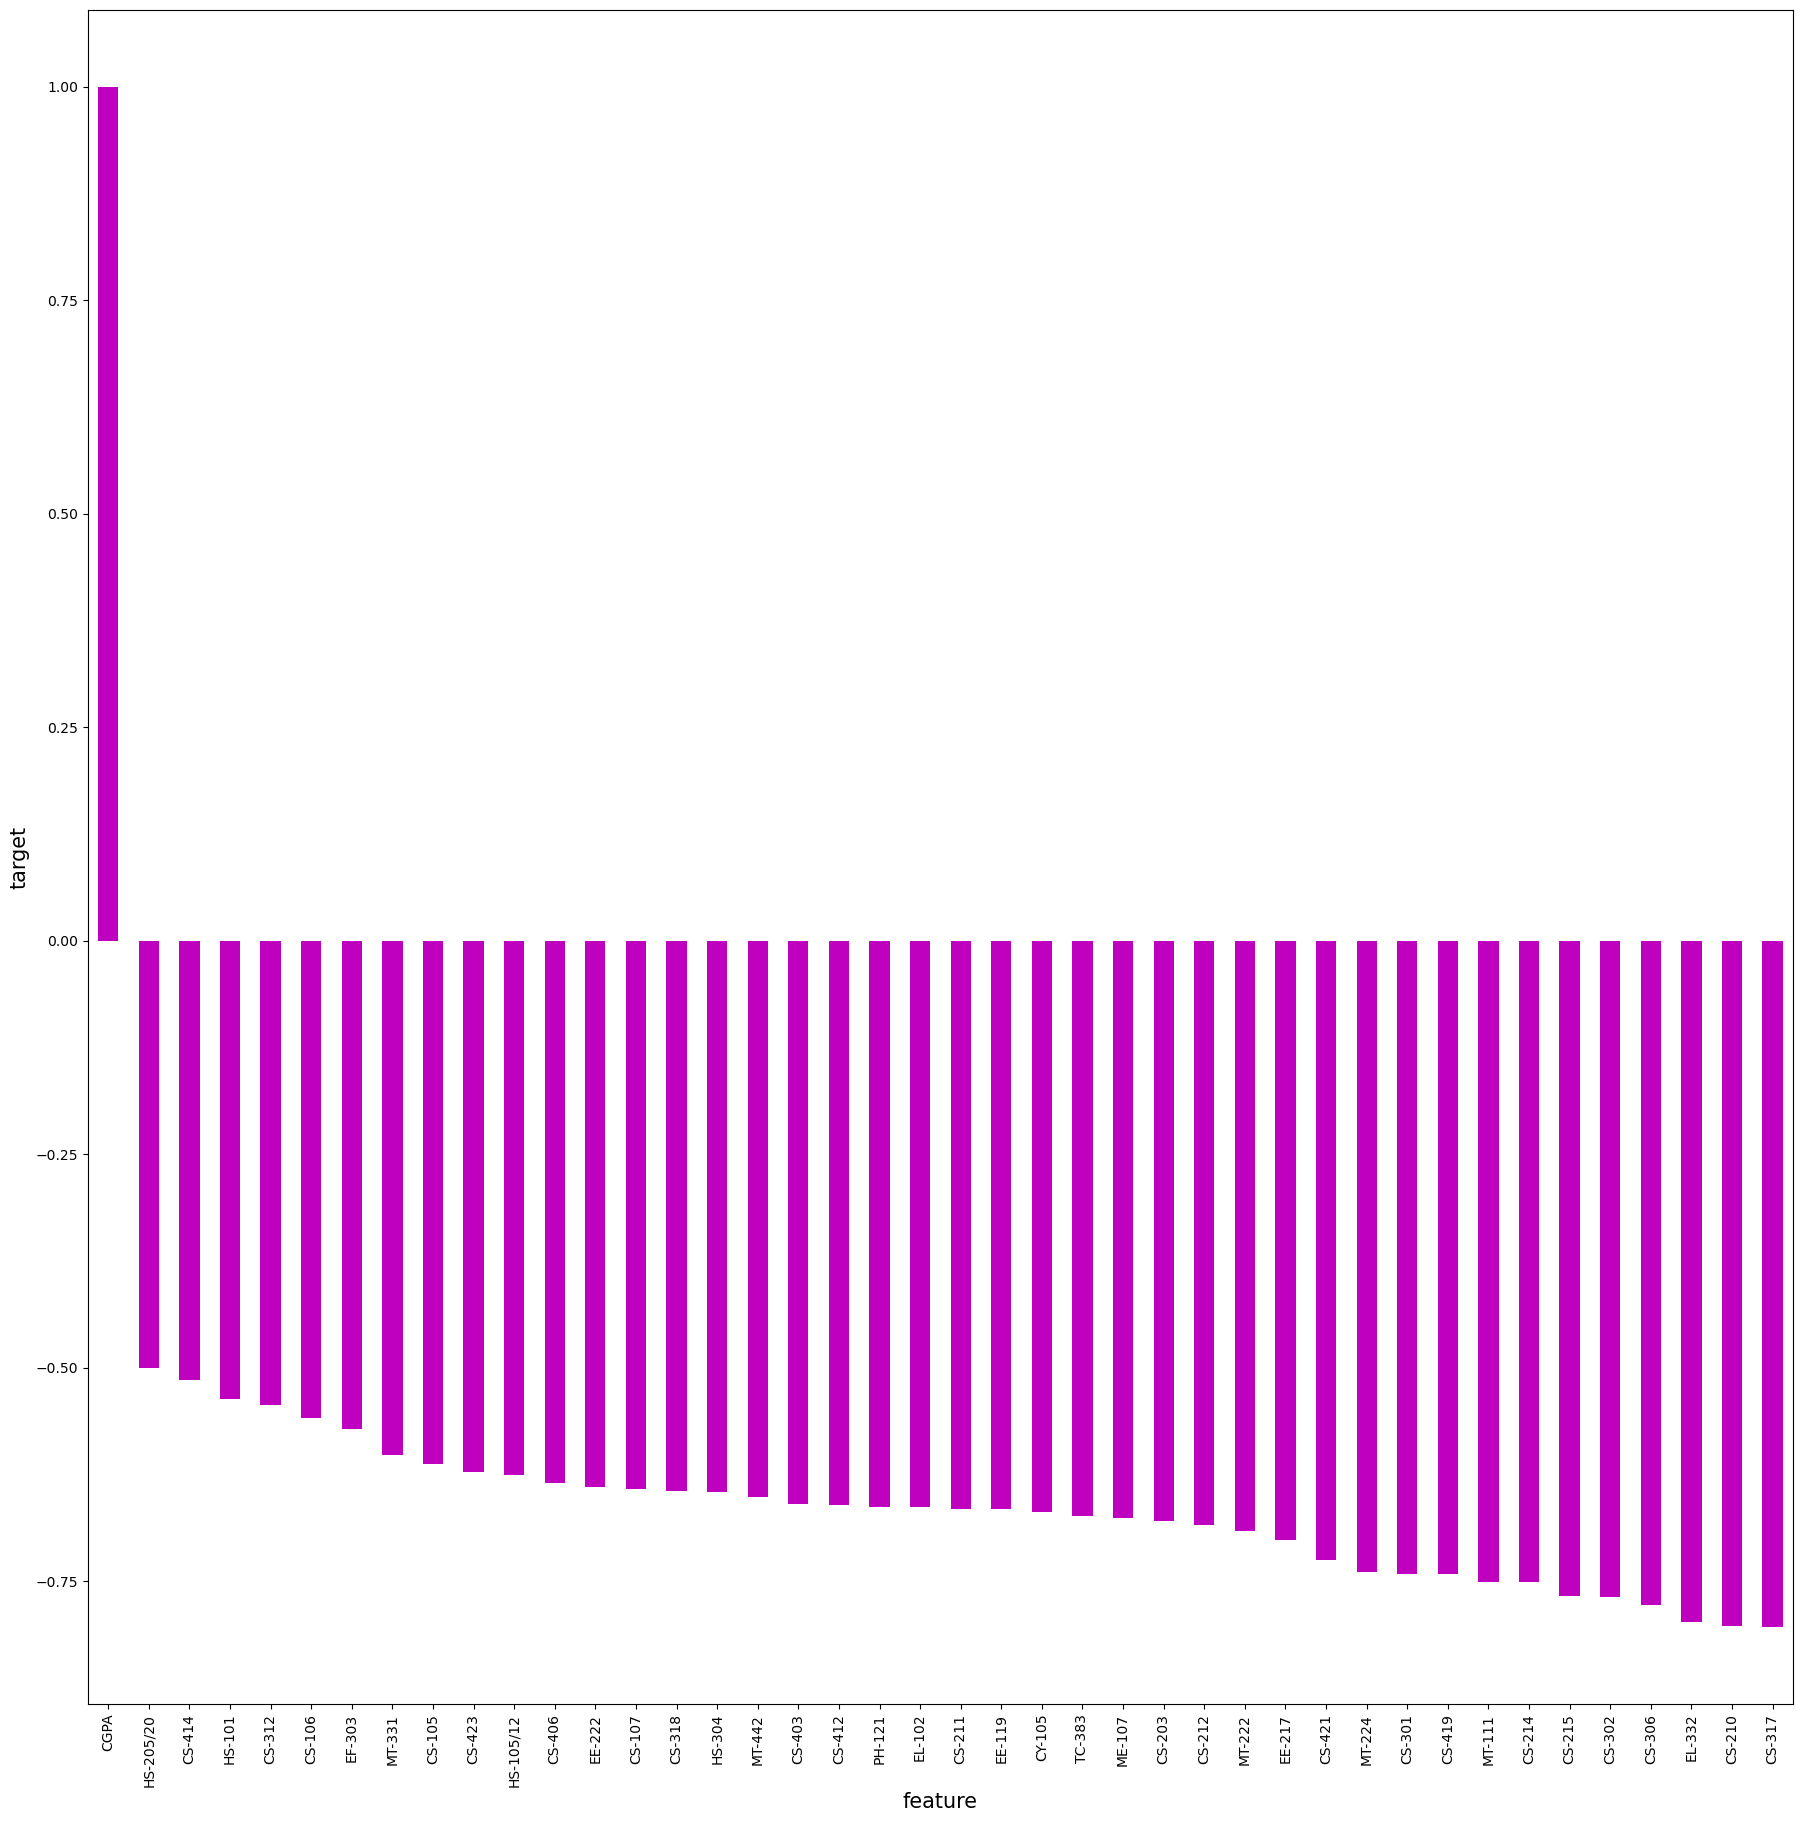

In [29]:
plt.figure(figsize=(22,22))
df.corr()["CGPA"].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel("feature",fontsize=15)
plt.ylabel("target",fontsize=15)
plt.show()

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


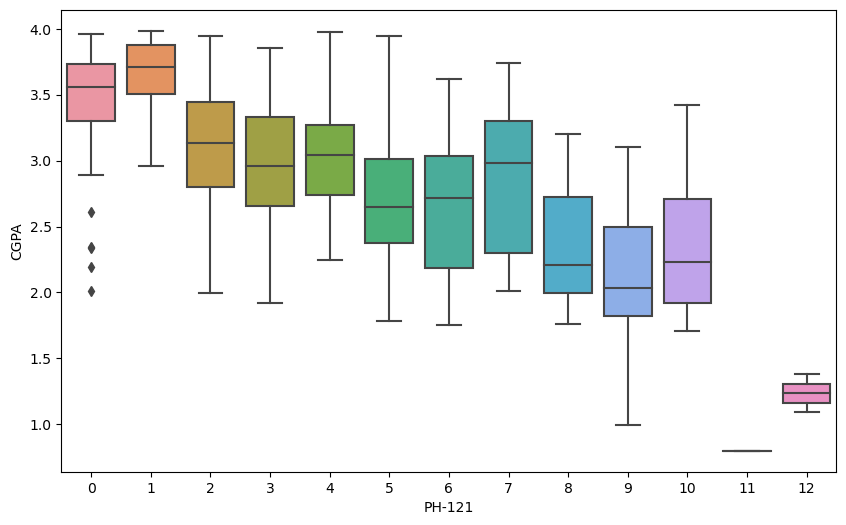

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


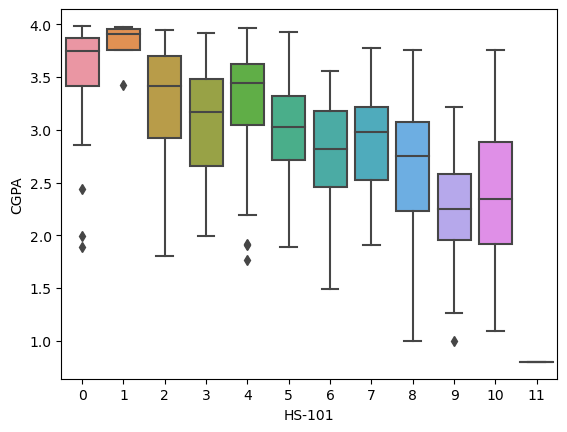

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


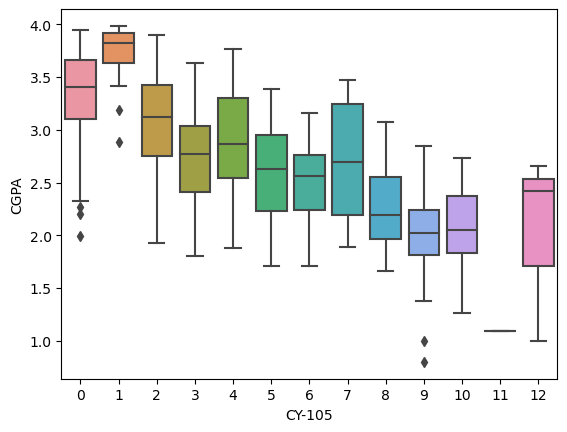

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


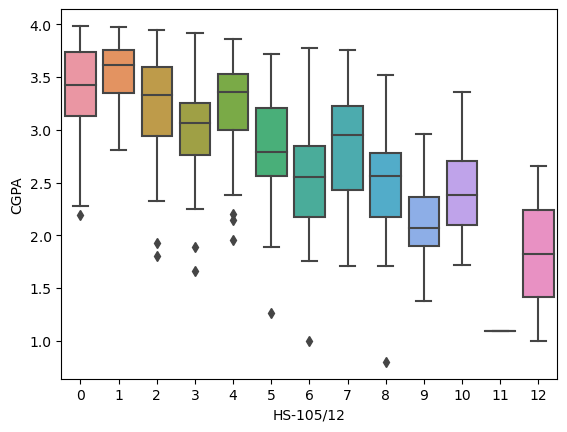

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


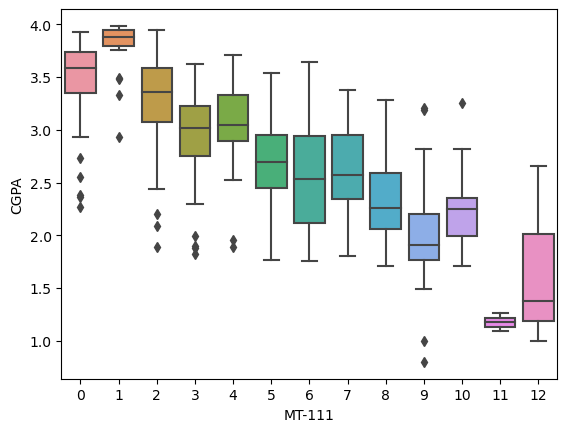

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


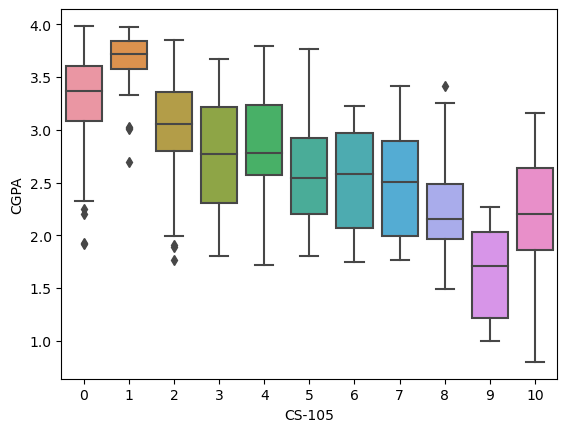

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


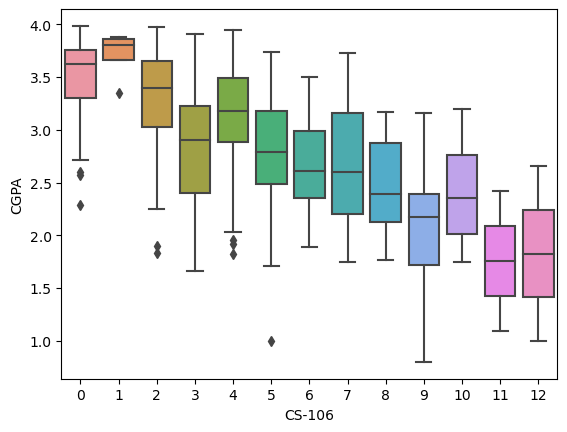

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


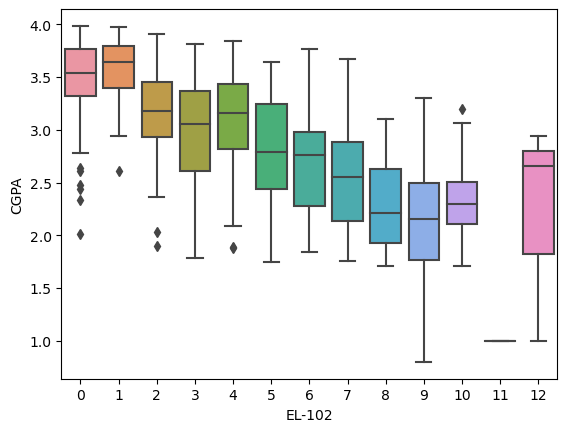

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


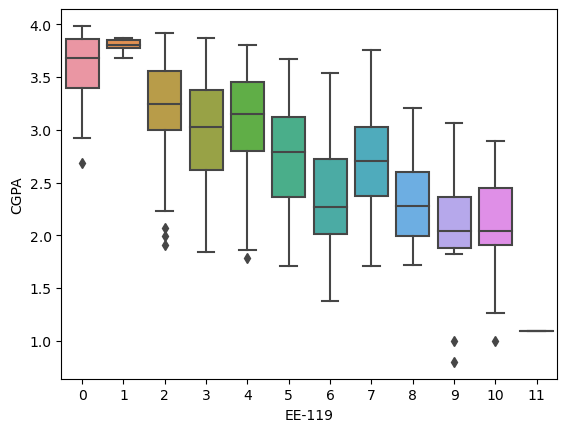

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


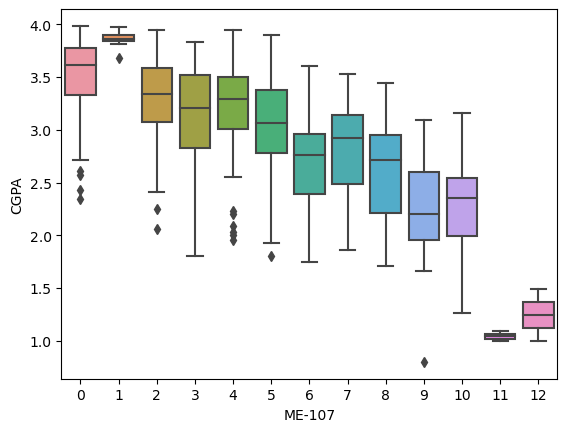

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


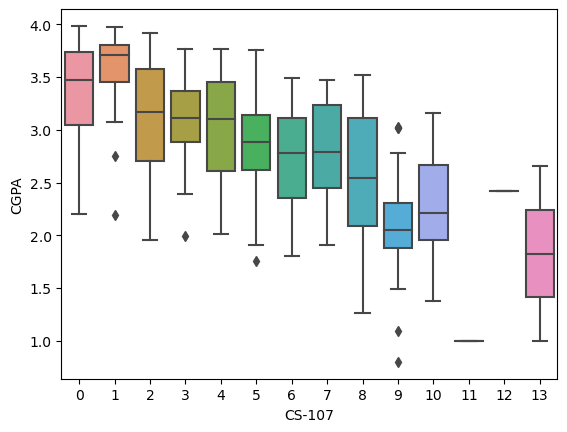

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


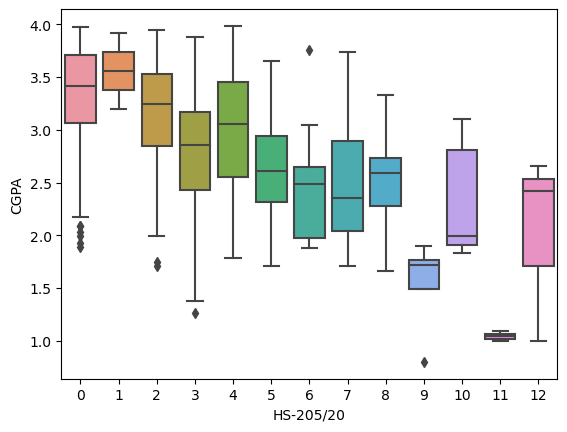

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


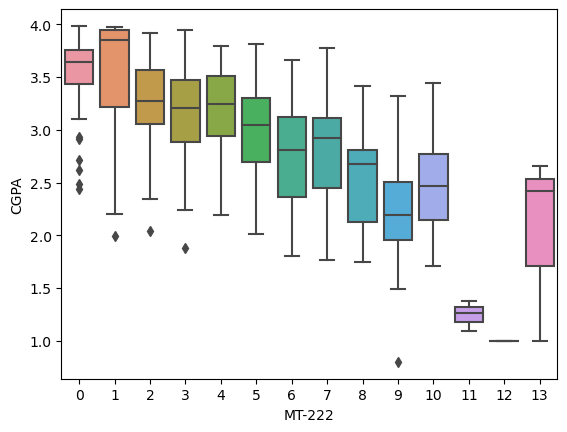

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


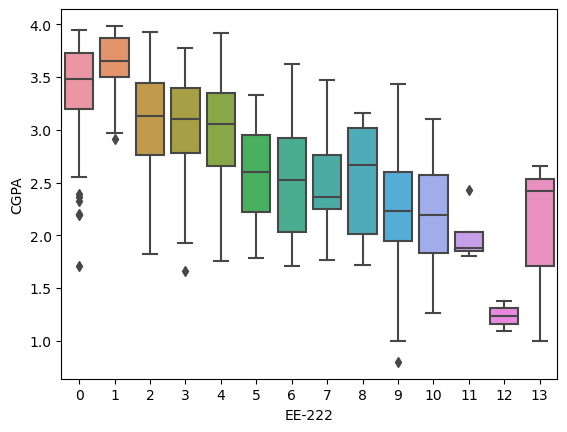

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


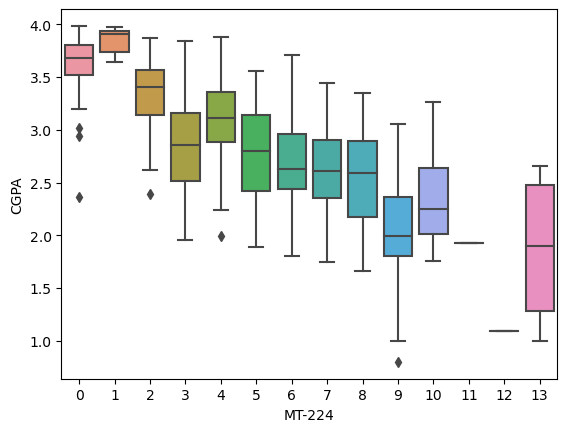

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


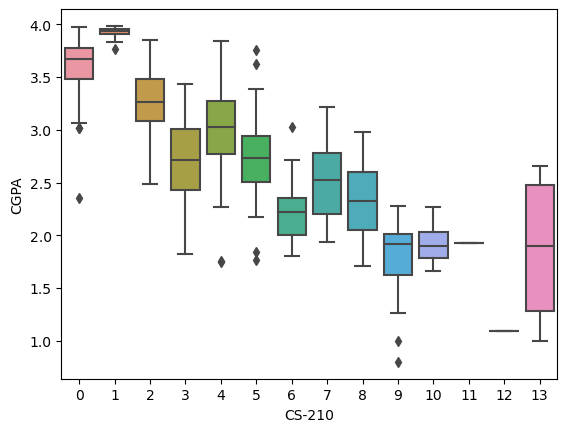

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


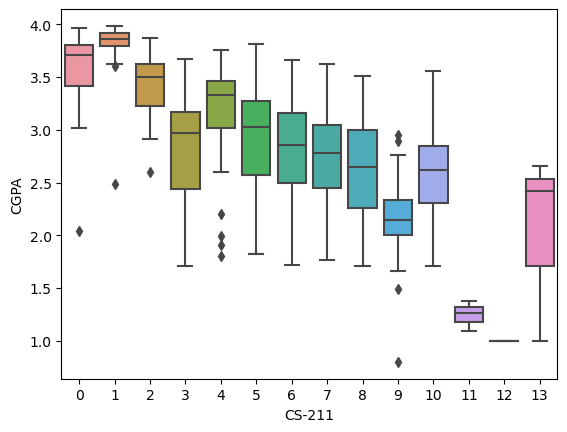

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


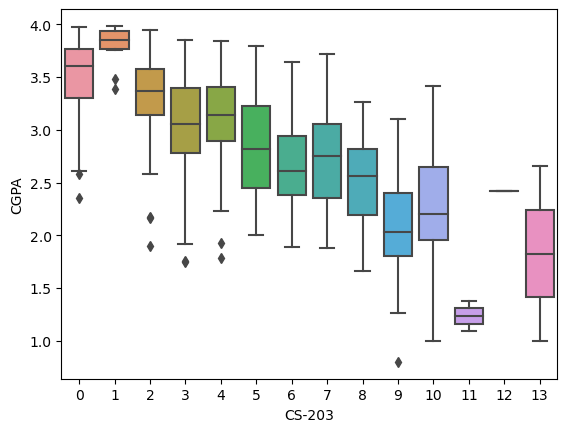

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


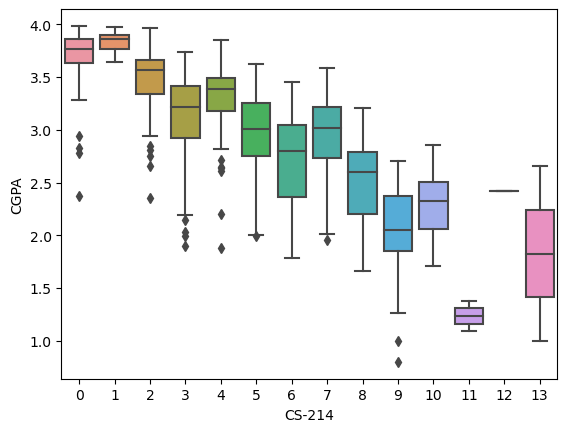

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


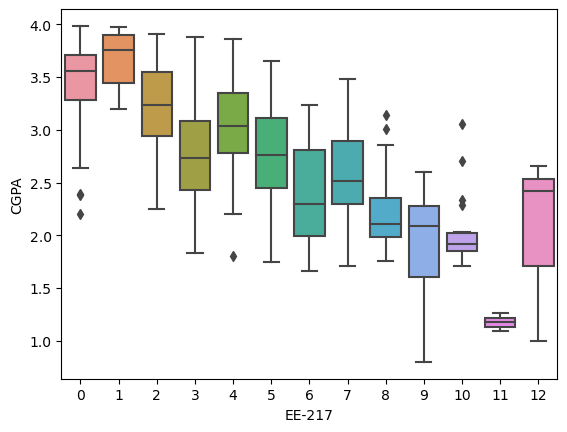

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


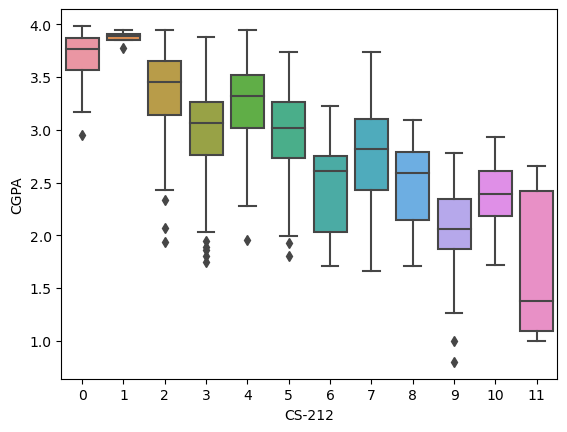

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


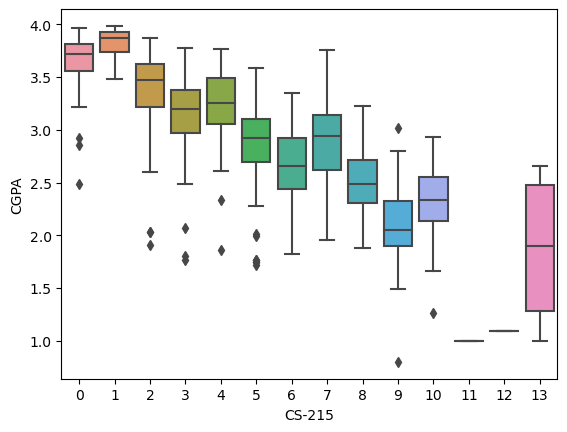

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


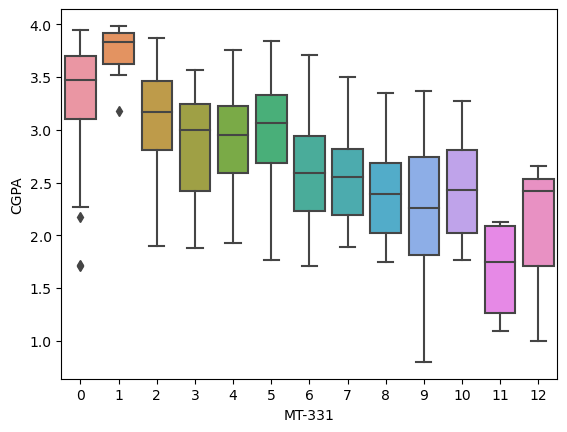

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


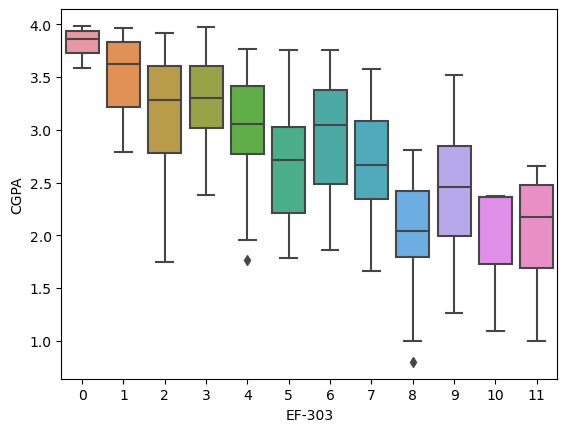

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


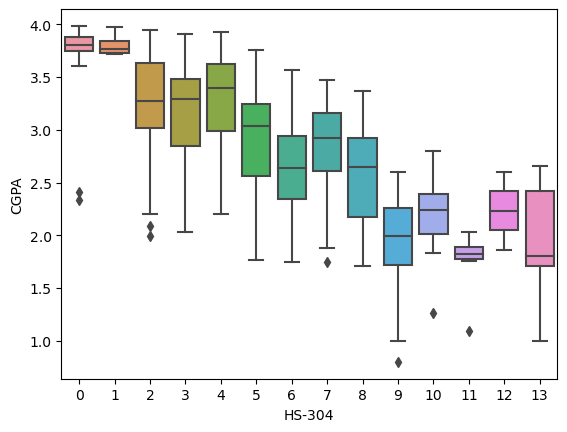

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


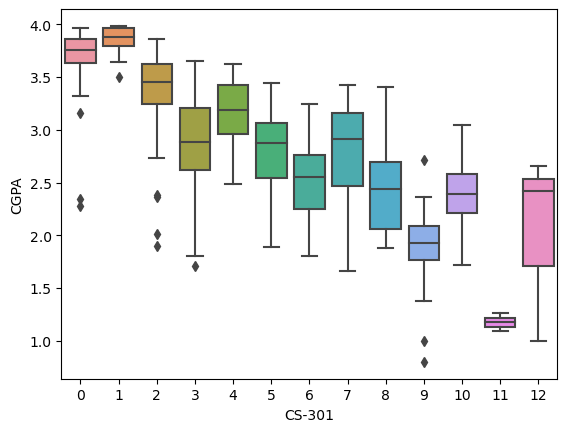

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


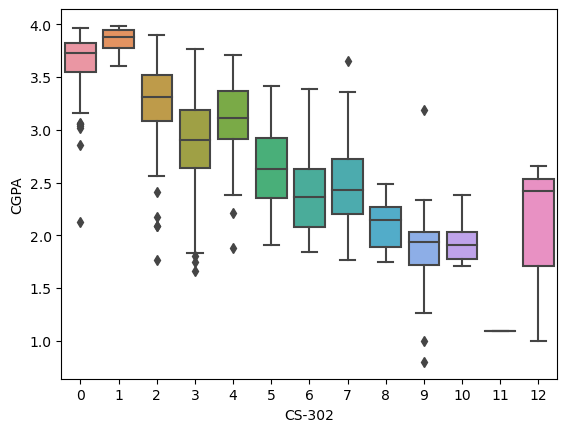

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


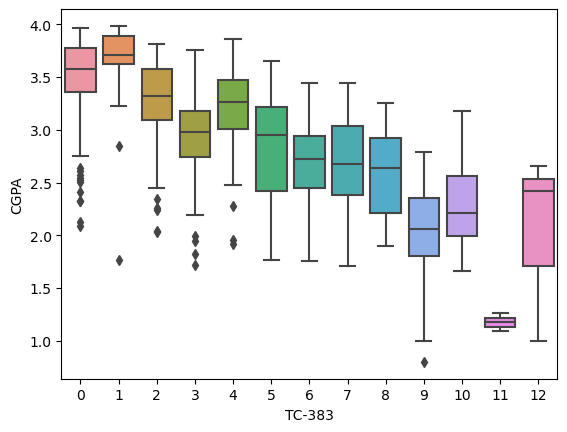

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


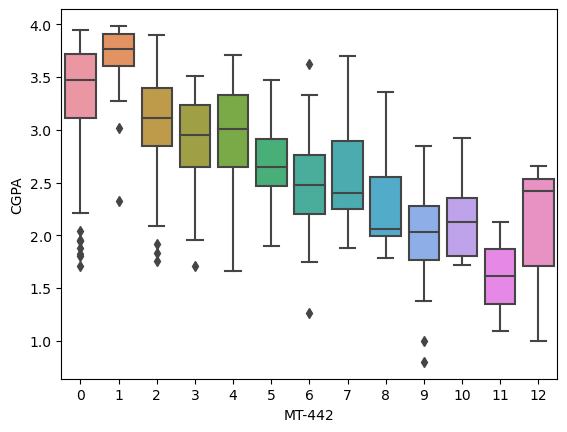

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


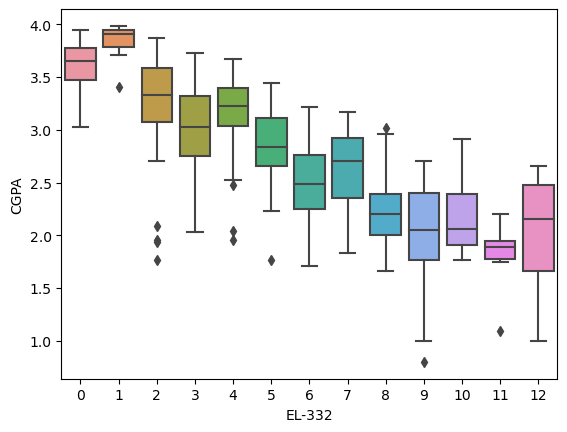

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


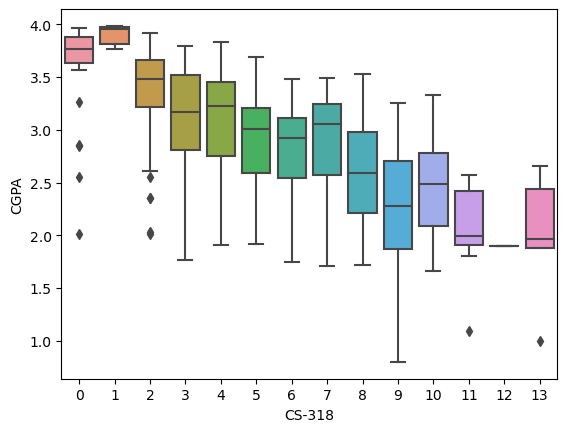

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


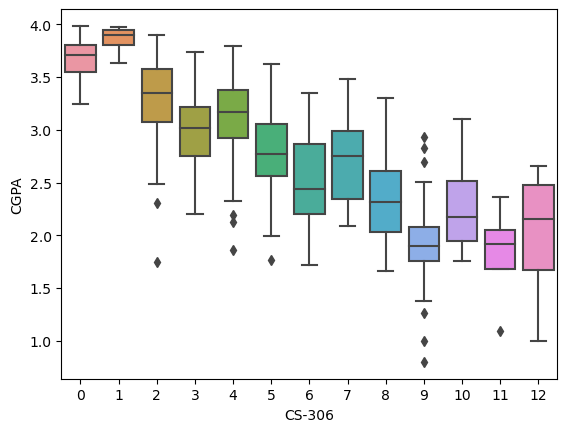

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


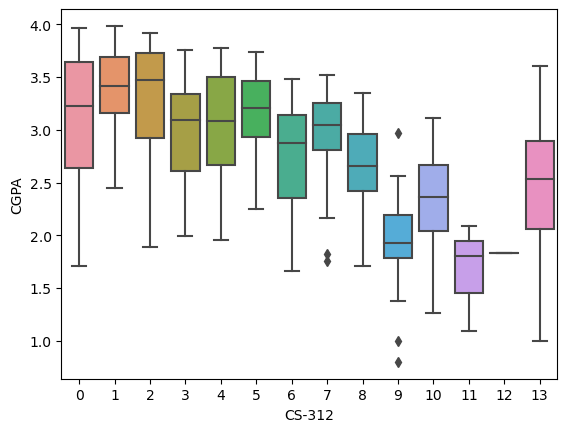

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


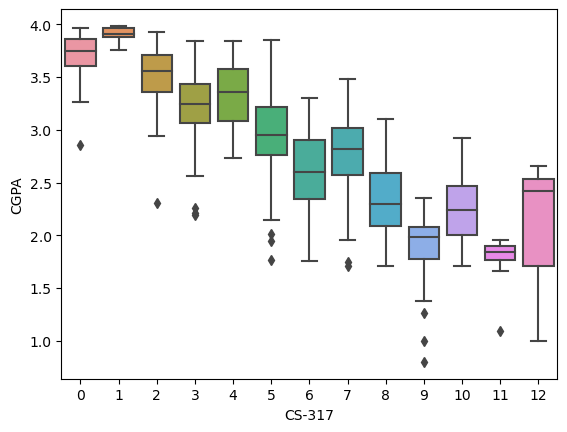

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


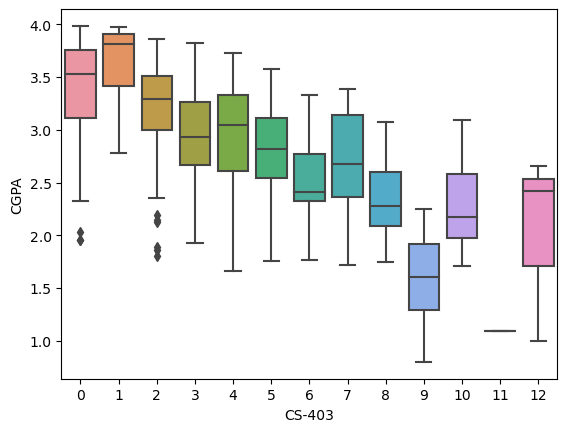

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


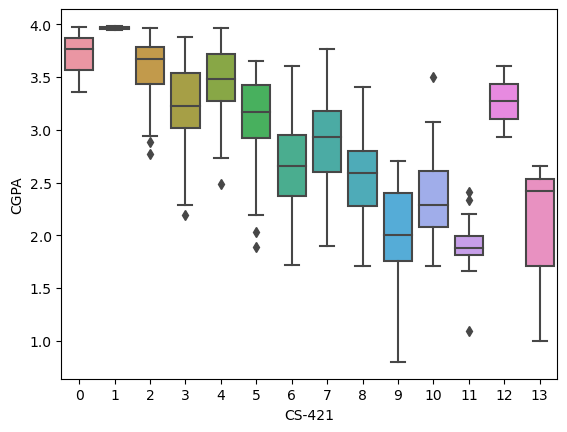

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


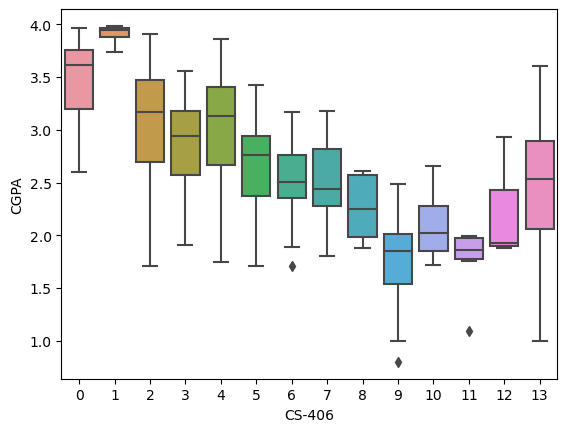

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


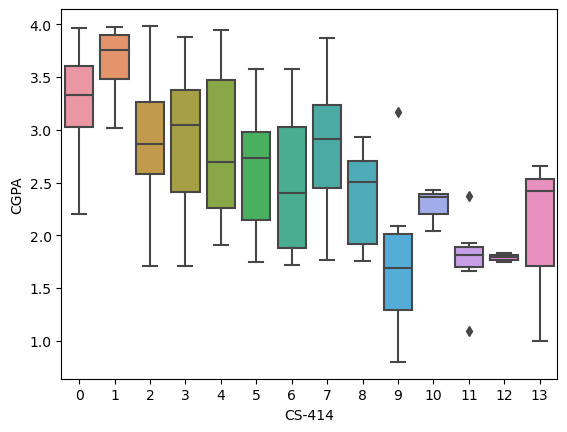

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


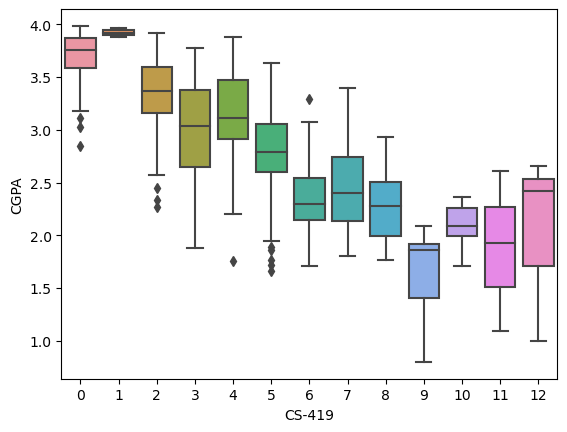

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


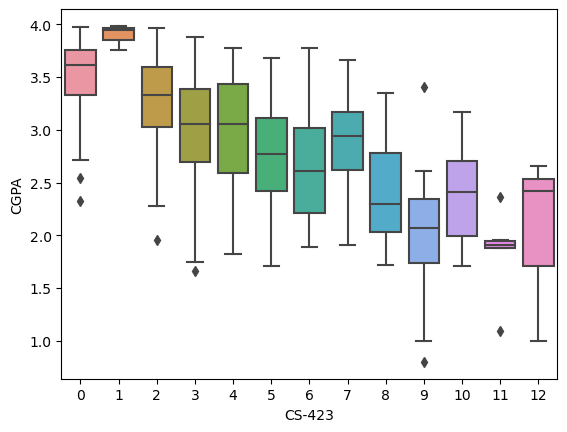

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


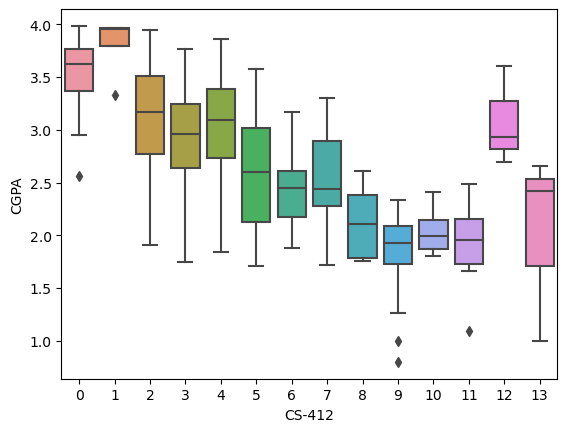

In [30]:
plt.figure(figsize=(10,6))
for i in col:
    sns.boxplot(df[i],y=df['CGPA'])
    plt.show()

We can see , almost all columns have outliers

In [31]:
from scipy.stats import zscore


In [32]:
z=np.abs(zscore(df))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.400402,1.770900,1.712045,0.544730,1.360072,2.657832,1.766924,1.320486,0.407992,1.019762,...,1.098250,1.087907,1.429024,0.884632,0.446569,0.959975,1.583236,0.387572,0.537177,1.209480
1,1.242052,1.411559,2.385308,1.482542,0.359727,1.173242,1.766924,1.310120,2.280687,1.337602,...,1.679976,1.440059,0.777549,1.241863,0.446569,0.886877,0.790229,0.641747,0.171589,1.527217
2,1.242052,0.744483,0.981007,0.232126,0.026279,1.053643,0.309483,0.005183,0.715625,0.887282,...,0.356065,0.672850,1.176877,0.170170,1.157840,0.959975,1.588791,0.730678,1.268352,1.053392
3,1.714365,0.692879,2.385308,1.482542,1.693521,0.311348,2.131284,1.320486,1.906148,0.701921,...,1.679976,0.383605,2.080499,0.884632,0.620338,0.148136,1.186732,0.984854,1.290761,1.691731
4,0.585070,1.103823,0.307744,0.080478,1.307515,1.053643,0.783598,0.005183,1.464704,0.887282,...,0.225661,0.320698,0.126074,0.187061,0.446569,0.959975,0.795784,0.730678,1.268352,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.256579,1.822504,0.981007,0.705685,0.974066,1.053643,0.783598,0.652469,1.090164,0.251601,...,0.646928,1.025001,1.176877,1.973216,1.157840,0.517507,0.002778,0.387572,1.268352,1.359839
567,0.913561,1.822504,0.981007,1.330893,1.307515,1.053643,1.512318,0.652469,1.464704,1.522963,...,0.065202,0.320698,1.176877,1.973216,0.446569,0.148136,0.795784,0.641747,0.537177,1.317904
568,0.256579,1.822504,0.307744,0.080478,1.307515,1.053643,1.512318,1.310120,1.464704,0.569441,...,0.646928,0.672850,1.176877,0.544292,1.157840,1.256247,0.002778,0.730678,0.537177,0.830814
569,1.242052,0.385142,2.048677,1.330893,1.693521,2.657832,0.309483,1.320486,0.407992,1.019762,...,1.389113,0.672850,0.199664,0.884632,2.042880,1.256247,0.399281,0.298641,0.925174,1.228834


In [33]:
threshold=3
print(np.where(z>3))

(array([ 60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  91,
       137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 281,
       281, 281, 288, 288, 340, 340, 352, 352, 382, 387, 423, 424, 432,
       447, 447, 453, 453, 454, 454, 543, 543, 560, 565], dtype=int64), array([ 2, 11, 13, 15, 19, 24, 26, 28, 36, 37, 38, 40, 15,  2, 11, 13, 15,
       19, 24, 26, 28, 36, 37, 38, 40,  2, 11, 13, 15, 19, 24, 26, 28, 36,
       37, 38, 40, 41, 11, 37, 41, 11, 41, 24, 37, 24, 37, 37, 37, 37, 37,
       40, 36, 37, 36, 40, 36, 37, 36, 40, 37, 41], dtype=int64))


In [34]:
df1=df[(z<3).all(axis=1)]
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [35]:
# split the data into x and y
x=df.drop(['CGPA'],axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [36]:
y=df['CGPA']
y


0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
#split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
print(x_train.shape),print(x_test.shape),print(y_train.shape),print(y_test.shape)

(456, 41)
(115, 41)
(456,)
(115,)


(None, None, None, None)

# import some library

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
predlr_train=lr.predict(x_train)
print("r2 score:", r2_score(y_test,predlr))
print("r2 score on training data:", r2_score(y_train,predlr_train))
print("mean squared error:", mean_squared_error(y_test,predlr))
print("mean_absolute_error:",mean_absolute_error(y_test,predlr))      

r2 score: 0.9778848330422393
r2 score on training data: 0.9595490371214195
mean squared error: 0.00735965213815985
mean_absolute_error: 0.06102416105161293


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

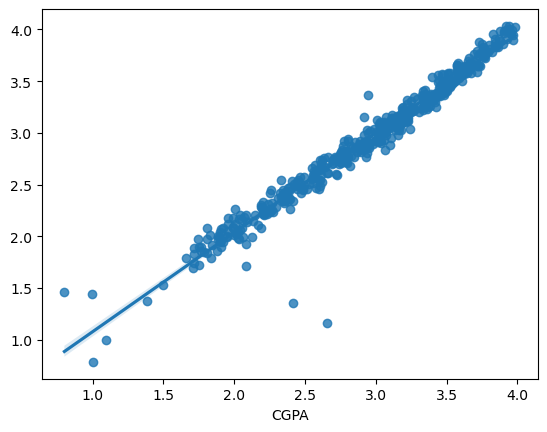

In [42]:
sns.regplot(y_train,predlr_train)

<AxesSubplot:xlabel='CGPA'>

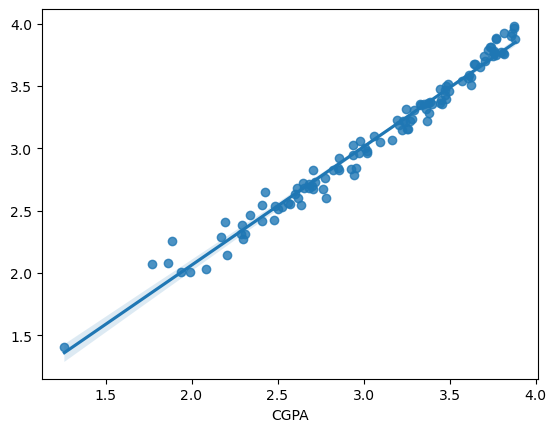

In [43]:
sns.regplot(y_test,predlr)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
dtc=DecisionTreeRegressor()

In [46]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc_train=dtc.predict(x_train)
print("r2 score:", r2_score(y_test,preddtc))
print("r2 score on training data:", r2_score(y_train,preddtc_train))
print("mean squared error:", mean_squared_error(y_test,preddtc))
print("mean_absolute_error:",mean_absolute_error(y_test,preddtc))      

r2 score: 0.8350951300936312
r2 score on training data: 1.0
mean squared error: 0.054878286956521735
mean_absolute_error: 0.17750434782608696


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

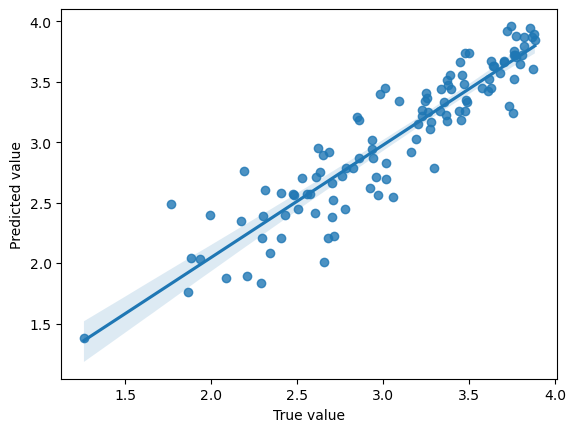

In [47]:
sns.regplot(y_test,preddtc)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [48]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn_train=knn.predict(x_train)
print("r2 score:", r2_score(y_test,predknn))
print("r2 score on training data:", r2_score(y_train,predknn_train))
print("mean squared error:", mean_squared_error(y_test,predknn))
print("mean_absolute_error:",mean_absolute_error(y_test,predknn))      

r2 score: 0.9602647640614161
r2 score on training data: 0.9645804433148166
mean squared error: 0.013223391652173915
mean_absolute_error: 0.09109043478260867


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

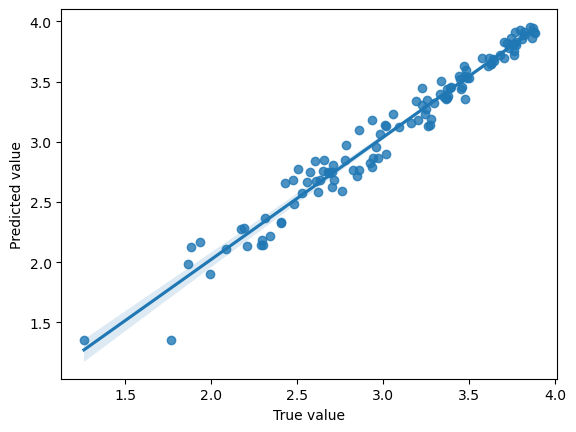

In [49]:
sns.regplot(y_test,predknn)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [54]:
# HYPER PARAMETRIC TUNNING
svm=SVR()
parameter1={'kernel':['rbf','poly','linear'],'C':[1,10]}
gv=GridSearchCV(estimator=svm,param_grid=parameter1)
gv.fit(x,y)
print(gv.best_params_)
gv.best_score_

{'C': 10, 'kernel': 'rbf'}


0.9635649208478452

by parametric tunnung rbf is best parameter

In [55]:
svm=SVR(kernel="rbf",C=10)
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
predsvm_train=svm.predict(x_train)
print("r2 score:", r2_score(y_test,predsvm))
print("r2 score on training data:", r2_score(y_train,predsvm_train))
print("mean squared error:", mean_squared_error(y_test,predsvm))
print("mean_absolute_error:",mean_absolute_error(y_test,predsvm))      

r2 score: 0.9795389905779602
r2 score on training data: 0.988782692589725
mean squared error: 0.0068091691113812865
mean_absolute_error: 0.064139652190981


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

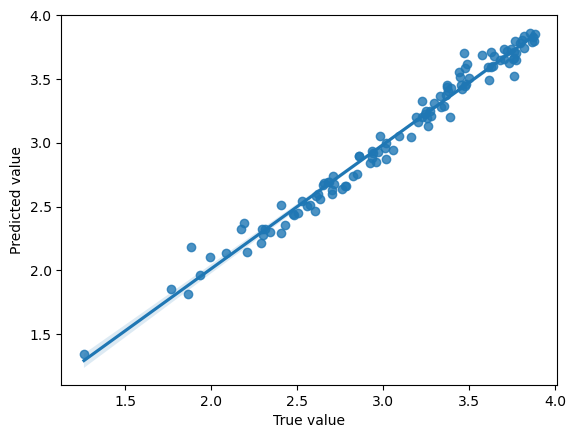

In [56]:
sns.regplot(y_test,predsvm)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [57]:
ls=Lasso()
rd=Ridge()

In [58]:
dict1={"alpha":[.0001,.001,.01,.1,1]}
gv=GridSearchCV(estimator=ls,param_grid=dict1)
gv.fit(x,y)
print(gv.best_params_)
gv.best_score_

{'alpha': 0.01}


0.9509591645071513

by parametric tunning 0.01 is the best

In [59]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
predls_train=ls.predict(x_train)
print("r2 score:", r2_score(y_test,predls))
print("r2 score on training data:", r2_score(y_train,predls_train))
print("mean squared error:", mean_squared_error(y_test,predls))
print("mean_absolute_error:",mean_absolute_error(y_test,predls))      

r2 score: 0.978102417867087
r2 score on training data: 0.9593829445963569
mean squared error: 0.0072872426182824124
mean_absolute_error: 0.0601761414666817


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

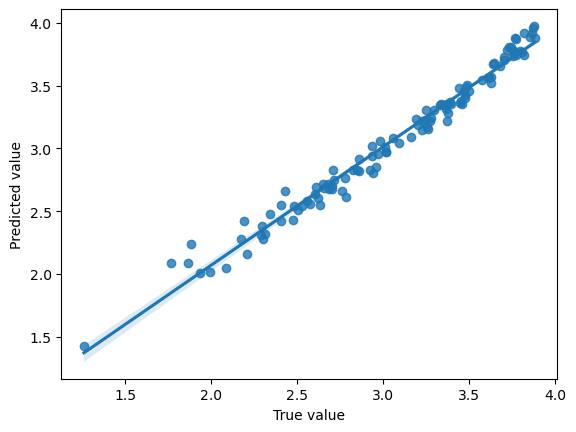

In [60]:
sns.regplot(y_test,predls)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [61]:
gv=GridSearchCV(estimator=rd,param_grid=dict1)
gv.fit(x,y)
print(gv.best_params_)
gv.best_score_

{'alpha': 1}


0.9500231355031878

In [62]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
predrd_train=rd.predict(x_train)
print("r2 score:", r2_score(y_test,predrd))
print("r2 score on training data:", r2_score(y_train,predrd_train))
print("mean squared error:", mean_squared_error(y_test,predrd))
print("mean_absolute_error:",mean_absolute_error(y_test,predrd))      

r2 score: 0.9778994457276174
r2 score on training data: 0.9595490306605889
mean squared error: 0.0073547892184544356
mean_absolute_error: 0.06100275015438972


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

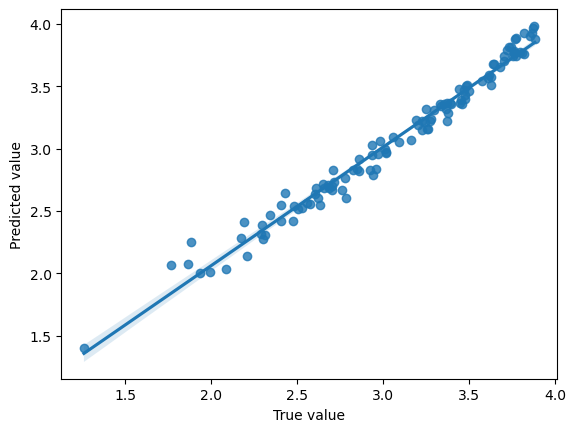

In [63]:
sns.regplot(y_test,predrd)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [64]:
random=RandomForestRegressor()
random.fit(x_train,y_train)
predrandom=random.predict(x_test)
predrandom_train=random.predict(x_train)
print("r2 score:", r2_score(y_test,predrandom))
print("r2 score on training data:", r2_score(y_train,predrandom_train))
print("mean squared error:", mean_squared_error(y_test,predrandom))
print("mean_absolute_error:",mean_absolute_error(y_test,predrandom))      

r2 score: 0.9601410922406071
r2 score on training data: 0.992064195223615
mean squared error: 0.013264548093913022
mean_absolute_error: 0.08084834782608685


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

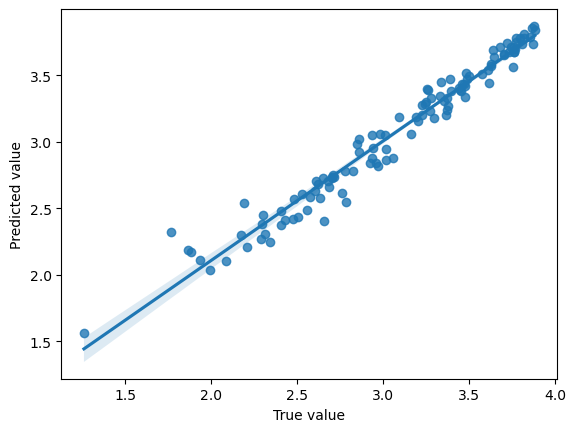

In [65]:
sns.regplot(y_test,predrandom)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [66]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
predada_train=ada.predict(x_train)
print("r2 score:", r2_score(y_test,predada))
print("r2 score on training data:", r2_score(y_train,predada_train))
print("mean squared error:", mean_squared_error(y_test,predada))
print("mean_absolute_error:",mean_absolute_error(y_test,predada))      

r2 score: 0.9029803140108581
r2 score on training data: 0.9491801548715507
mean squared error: 0.03228694320044535
mean_absolute_error: 0.14776801855555172


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

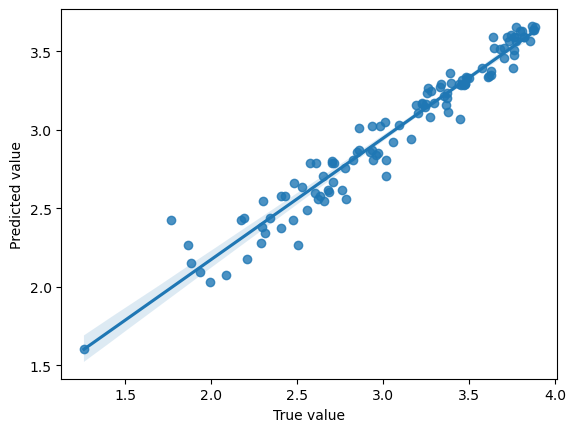

In [67]:
sns.regplot(y_test,predada)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [68]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
predgbr_train=gbr.predict(x_train)
print("r2 score:", r2_score(y_test,predgbr))
print("r2 score on training data:", r2_score(y_train,predgbr_train))
print("mean squared error:", mean_squared_error(y_test,predgbr))
print("mean_absolute_error:",mean_absolute_error(y_test,predgbr))      

r2 score: 0.974613844522681
r2 score on training data: 0.9967955045305733
mean squared error: 0.008448196380120294
mean_absolute_error: 0.07176150368578897


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

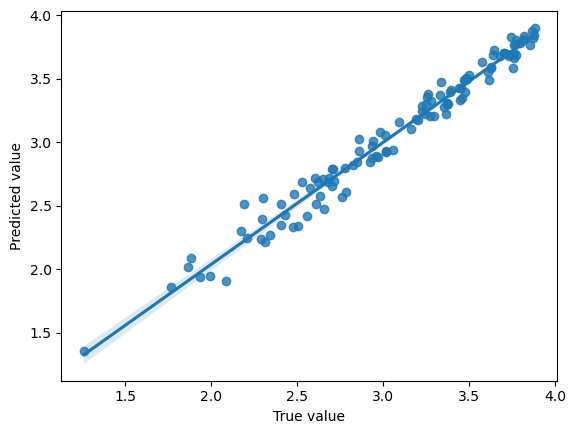

In [69]:
sns.regplot(y_test,predgbr)
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [70]:
#compare perfomance of the model
print("r2 score of Linear Regression:",  r2_score(y_test,predlr))
print("r2 score of SVR :",  r2_score(y_test,predsvm))
print("r2 score of Decision Tree:",  r2_score(y_test,preddtc))
print("r2 score of KNeighbors Regressor:",  r2_score(y_test,predknn))
print("r2 score of Lasso:",  r2_score(y_test,predls))
print("r2 score  of Ridge:",  r2_score(y_test,predrd))
print("r2 score  of AdaBoost Regressor:",  r2_score(y_test,predada))
print("r2 score of GradientBoost Regressor:",  r2_score(y_test,predgbr))
print("r2 score RandomForestRegressor:",  r2_score(y_test,predrandom))


r2 score of Linear Regression: 0.9778848330422393
r2 score of SVR : 0.9795389905779602
r2 score of Decision Tree: 0.8350951300936312
r2 score of KNeighbors Regressor: 0.9602647640614161
r2 score of Lasso: 0.978102417867087
r2 score  of Ridge: 0.9778994457276174
r2 score  of AdaBoost Regressor: 0.9029803140108581
r2 score of GradientBoost Regressor: 0.974613844522681
r2 score RandomForestRegressor: 0.9601410922406071


SVM performs well in among all the model

In [71]:
# cv score
score=cross_val_score(svm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.96912934 0.95629642 0.97072221 0.96707199 0.95460465]
0.9635649208478452
0.006746951149549415


In [72]:
# Save Model
import pickle
filename="SVR.pkl"
pickle.dump(svm,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

array([2.10530161, 3.6145383 , 2.73803293, 2.21519762, 3.747375  ,
       3.44507943, 2.55923763, 2.32574789, 2.3211859 , 2.94444185,
       3.46315023, 2.89321431, 3.64557584, 2.58557818, 3.80239526,
       2.64057177, 2.14161838, 3.59235306, 1.85479352, 2.29382994,
       2.30307074, 3.86410657, 2.37166388, 2.4333638 , 2.84251092,
       3.40531981, 3.25314268, 2.35556674, 3.29198558, 3.42054733,
       2.68738724, 2.66065761, 3.58766659, 3.43550872, 3.65843452,
       2.96247015, 2.68973547, 3.85261603, 2.84838473, 2.13942038,
       3.52721665, 3.45329892, 3.71910372, 3.73243328, 3.32947186,
       2.27803563, 2.6310345 , 3.20374572, 3.22263854, 3.70495701,
       3.13216375, 3.55812388, 3.19570716, 3.71515282, 3.51555785,
       3.0540415 , 3.80104395, 3.66672323, 3.65623372, 2.59577447,
       3.68458815, 3.59240225, 3.77998196, 3.51153874, 3.44975141,
       3.05196062, 3.28436343, 3.20193831, 2.92317431, 2.32100991,
       3.60547683, 3.2097359 , 2.51463732, 3.73592483, 3.78727

In [73]:
conculusion=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Predicted,2.105302,3.614538,2.738033,2.215198,3.747375,3.445079,2.559238,2.325748,2.321186,2.944442,...,3.687605,2.441849,2.544111,2.505911,2.670055,2.689693,3.367314,3.62919,3.704114,2.679946
Original,1.992000,3.490000,2.823000,2.288000,3.816000,3.476000,2.634000,2.294000,2.171000,3.060000,...,3.574000,2.478000,2.528000,2.559000,2.648000,2.683000,3.328000,3.73400,3.473000,2.715000


In [74]:
predicted=load_model.predict(x_test)[:]
original=y_test[:]

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted values')

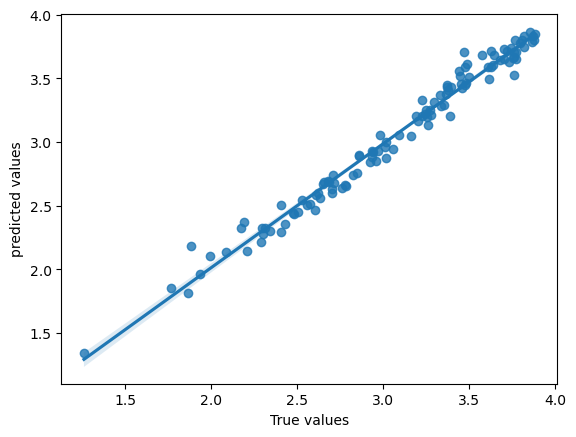

In [75]:
sns.regplot(original,predicted)
plt.xlabel("True values")
plt.ylabel("predicted values")